# 📊 Análisis de resultados de modelos predictivos
Este notebook carga las métricas de diferentes modelos (SVR, RF, LSTM, etc.) evaluados en distintos horizontes de predicción y genera gráficos comparativos.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Cargar archivo CSV con métricas
df = pd.read_csv("../outputs/metrics.csv")



In [3]:

# Seteo de estilo general para alta calidad
sns.set_theme(style="whitegrid", font_scale=1.2)
plt.rcParams['figure.dpi'] = 300

## 📈 Gráficos de MAE, RMSE y NRMSE por modelo y semanas de predicción

/var/folders/bx/bkqd8jm57437t30_zs7693sm0000gn/T/ipykernel_48087/1589388402.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


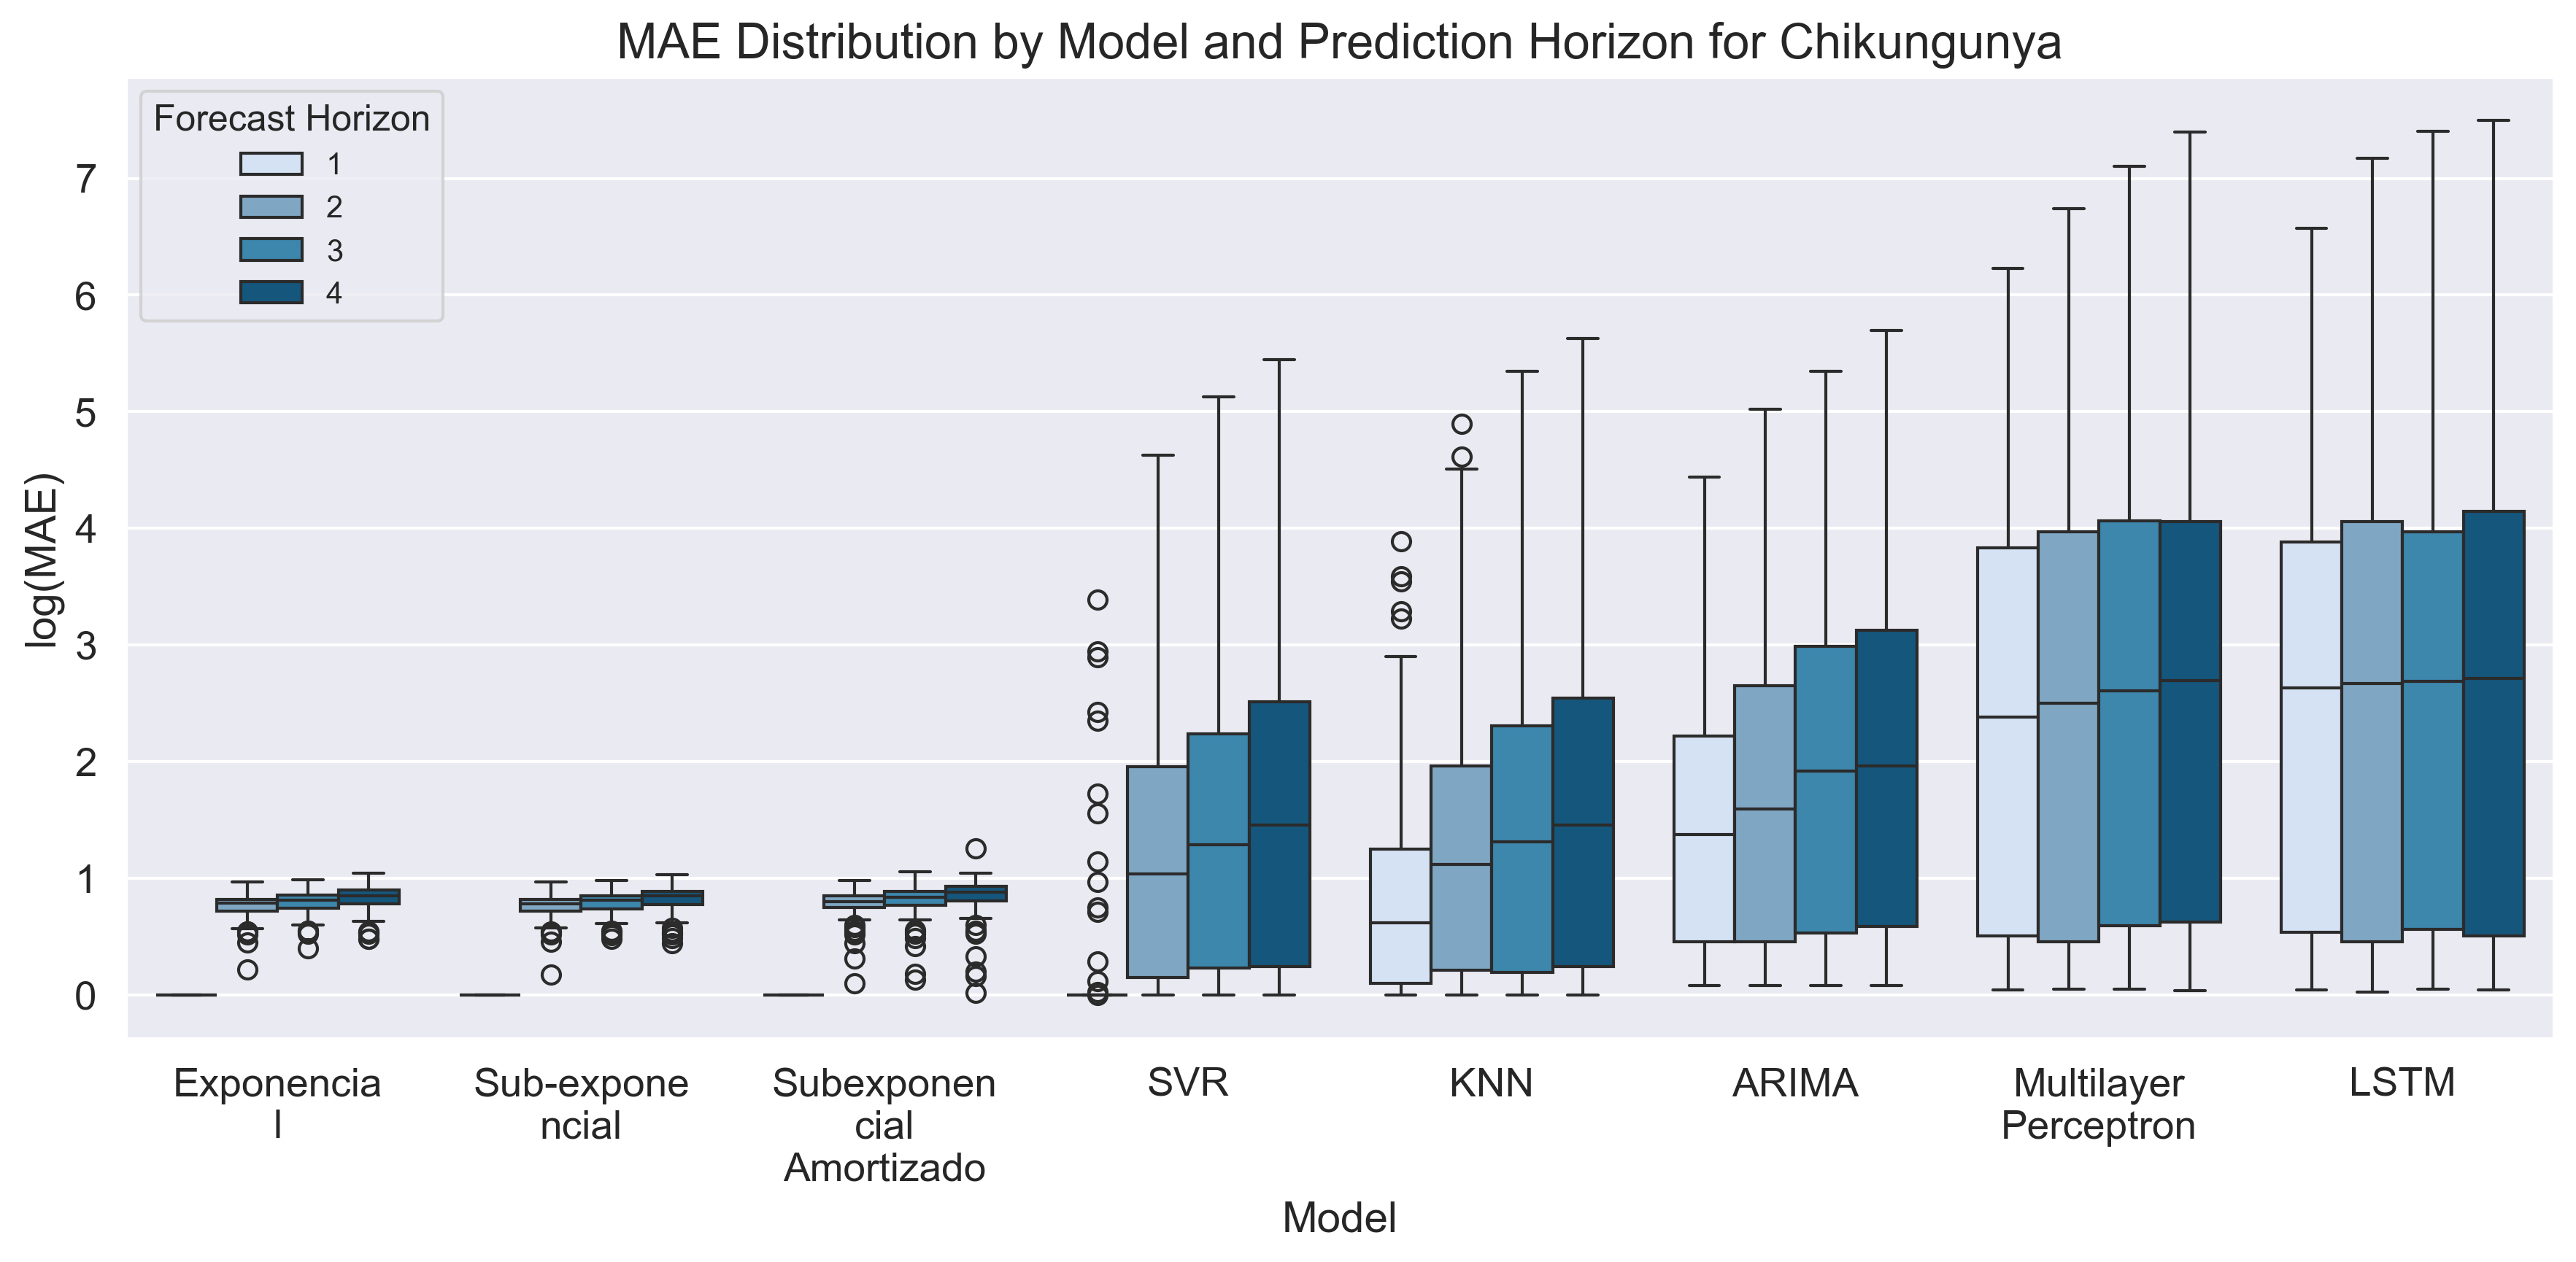

/var/folders/bx/bkqd8jm57437t30_zs7693sm0000gn/T/ipykernel_48087/1589388402.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


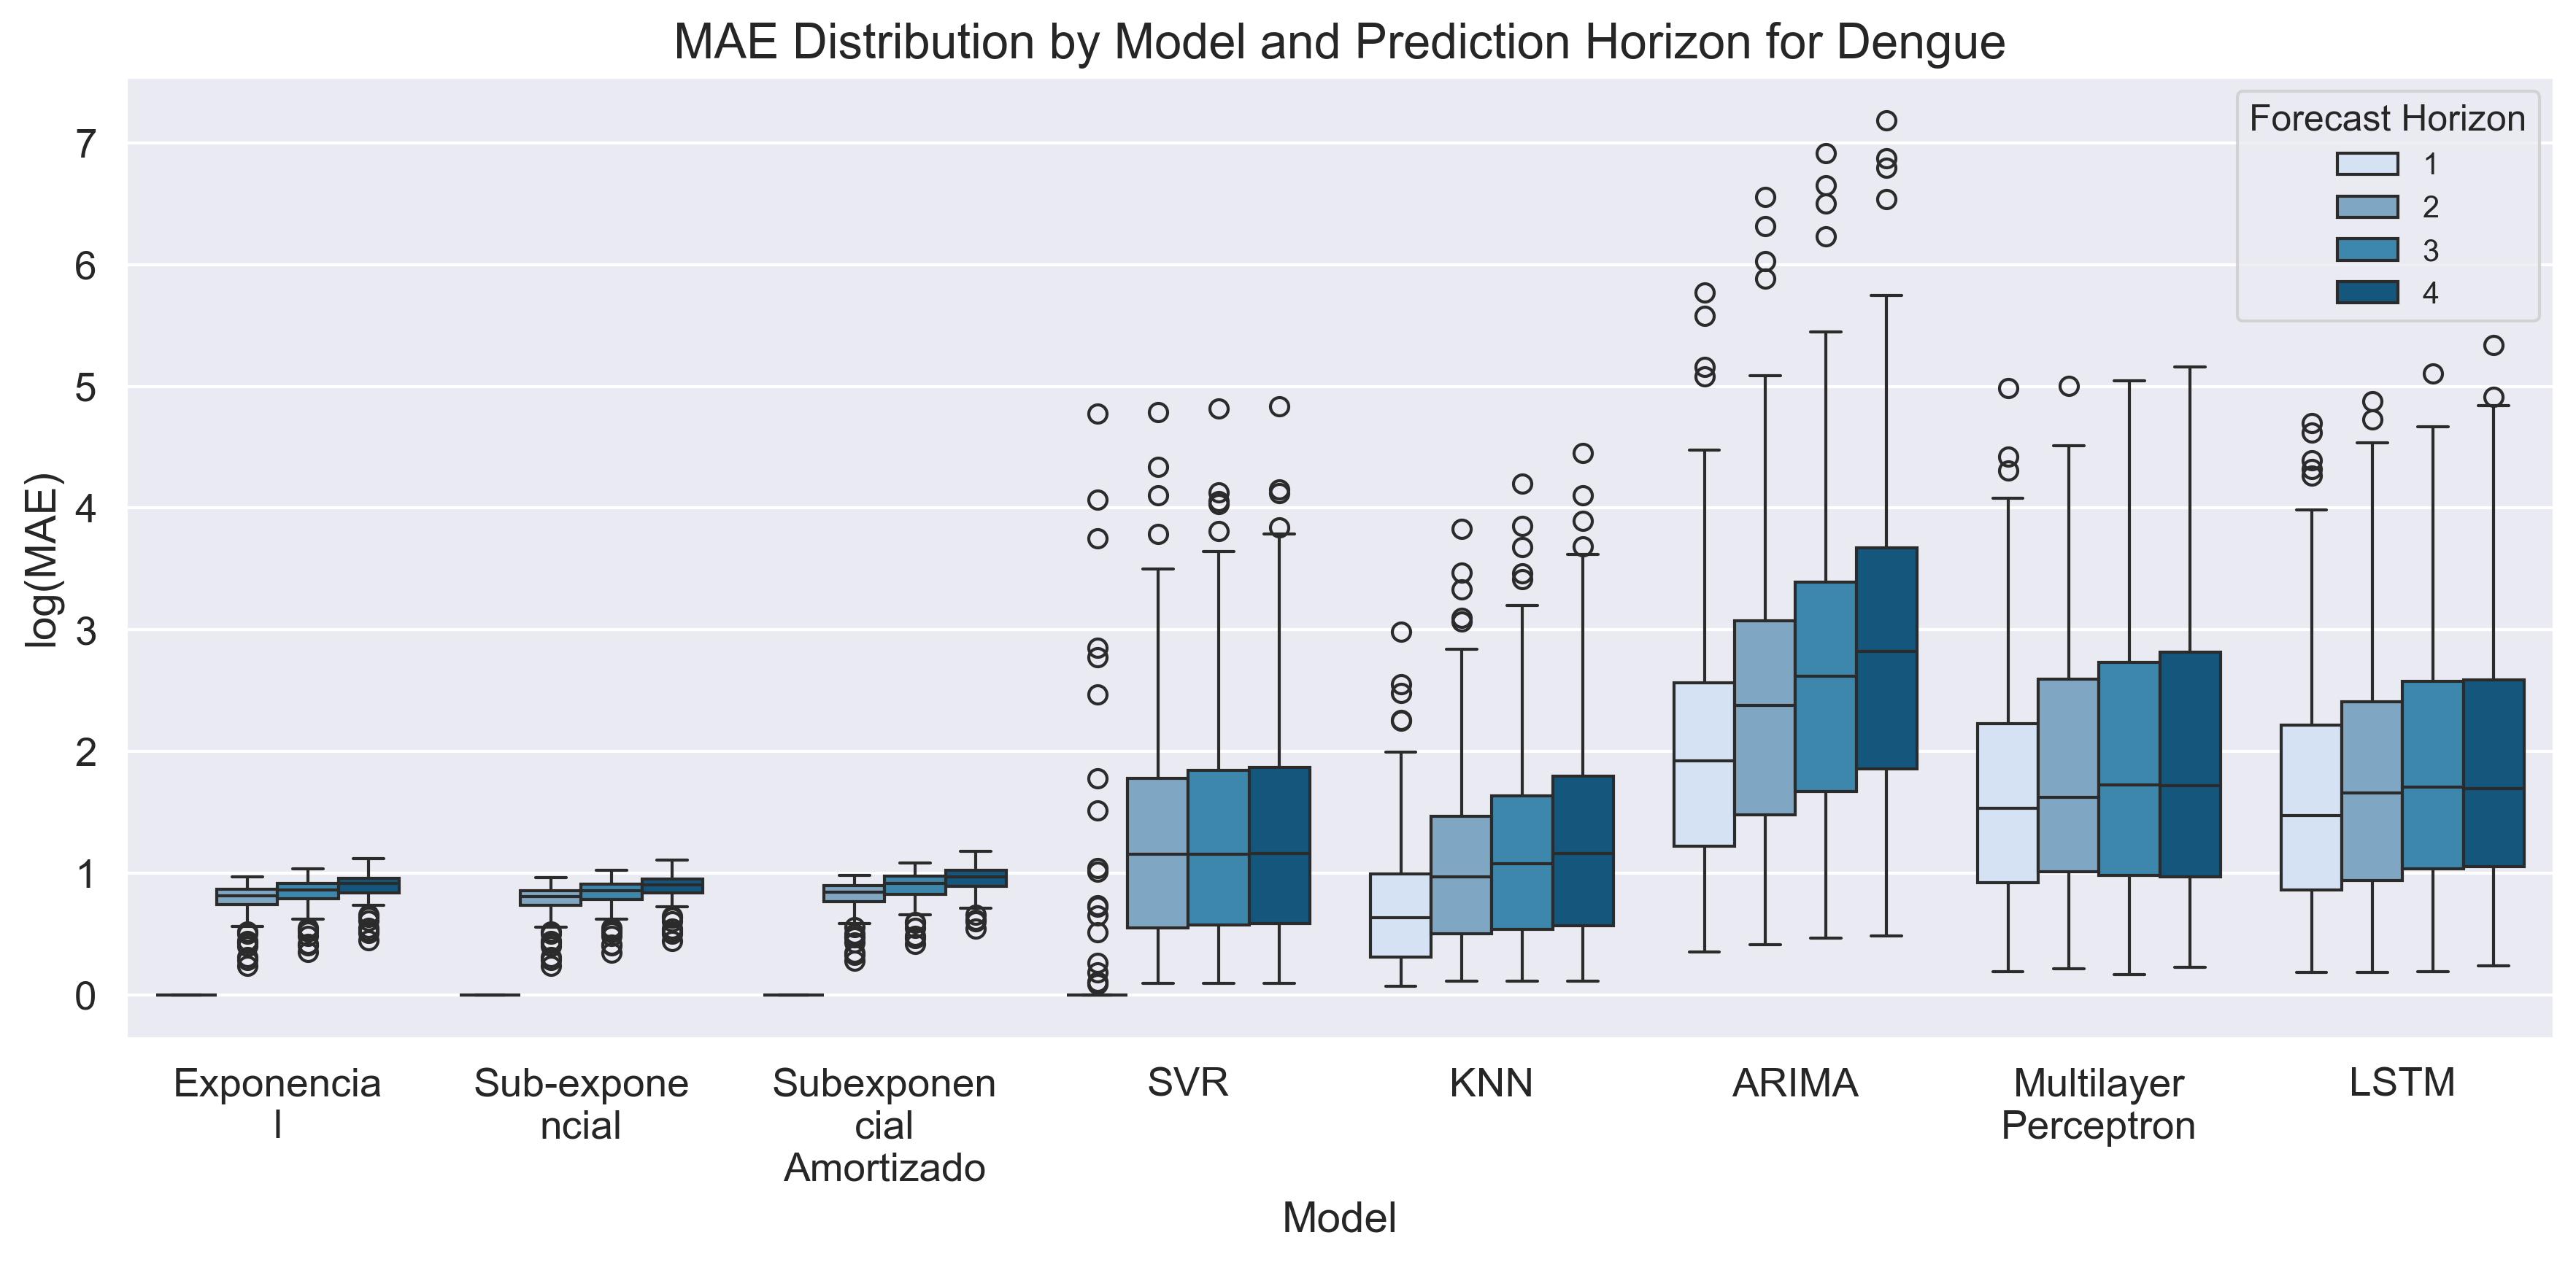

In [24]:
df['log_MAE'] = np.log1p(df['MAE'])
# Colores personalizados
palette = {1:"#d0e1f9", 2:"#74a9cf", 3:"#2b8cbe", 4:"#045a8d"}
# palette = sns.color_palette("pastel6", 4)

orden_metodos = ["exponential", "subexponential", "subexponential amortized",
                 "svr", "knn", "autoarima", "mlp", "lstm"]

for disease in ['chikungunya','dengue']:
    plt.figure(figsize=(12, 6))
    ax = sns.boxplot(
        data=df[df['Disease'] == disease],
        x="Method",
        y="log_MAE",
        hue="Prediction Weeks",
        palette=palette,
        order= orden_metodos
    )

    # Cambiar etiquetas del eje X a nombres más descriptivos
    new_labels = {
        "exponential": "Exponencial",
        "subexponential": "Sub-exponencial",
        "subexponential amortized": "Subexponencial Amortizado",
        "autoarima": "ARIMA",
        "svr": "SVR",
        "knn": "KNN",
        "mlp": "Multilayer Perceptron",
        "lstm": "LSTM",

    }

    # Obtener las posiciones y aplicar los nuevos labels
    labels = [textwrap.fill(new_labels.get(label.get_text(), label.get_text()), width=10)
              for label in ax.get_xticklabels()]
    ax.set_xticklabels(labels)

    # Títulos y etiquetas
    ax.set_title(f"MAE Distribution by Model and Prediction Horizon for {disease.capitalize()}", fontsize=16)
    ax.set_xlabel("Model", fontsize=14)
    ax.set_ylabel("log(MAE)", fontsize=14)

    # Leyenda más clara
    ax.legend(title="Forecast Horizon", title_fontsize=12, fontsize=10)

    plt.tight_layout()
    plt.savefig(f"graphs/boxplot_mae_method_disease_{disease}.svg", dpi=300)
    plt.show()


/var/folders/bx/bkqd8jm57437t30_zs7693sm0000gn/T/ipykernel_48087/1642100494.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


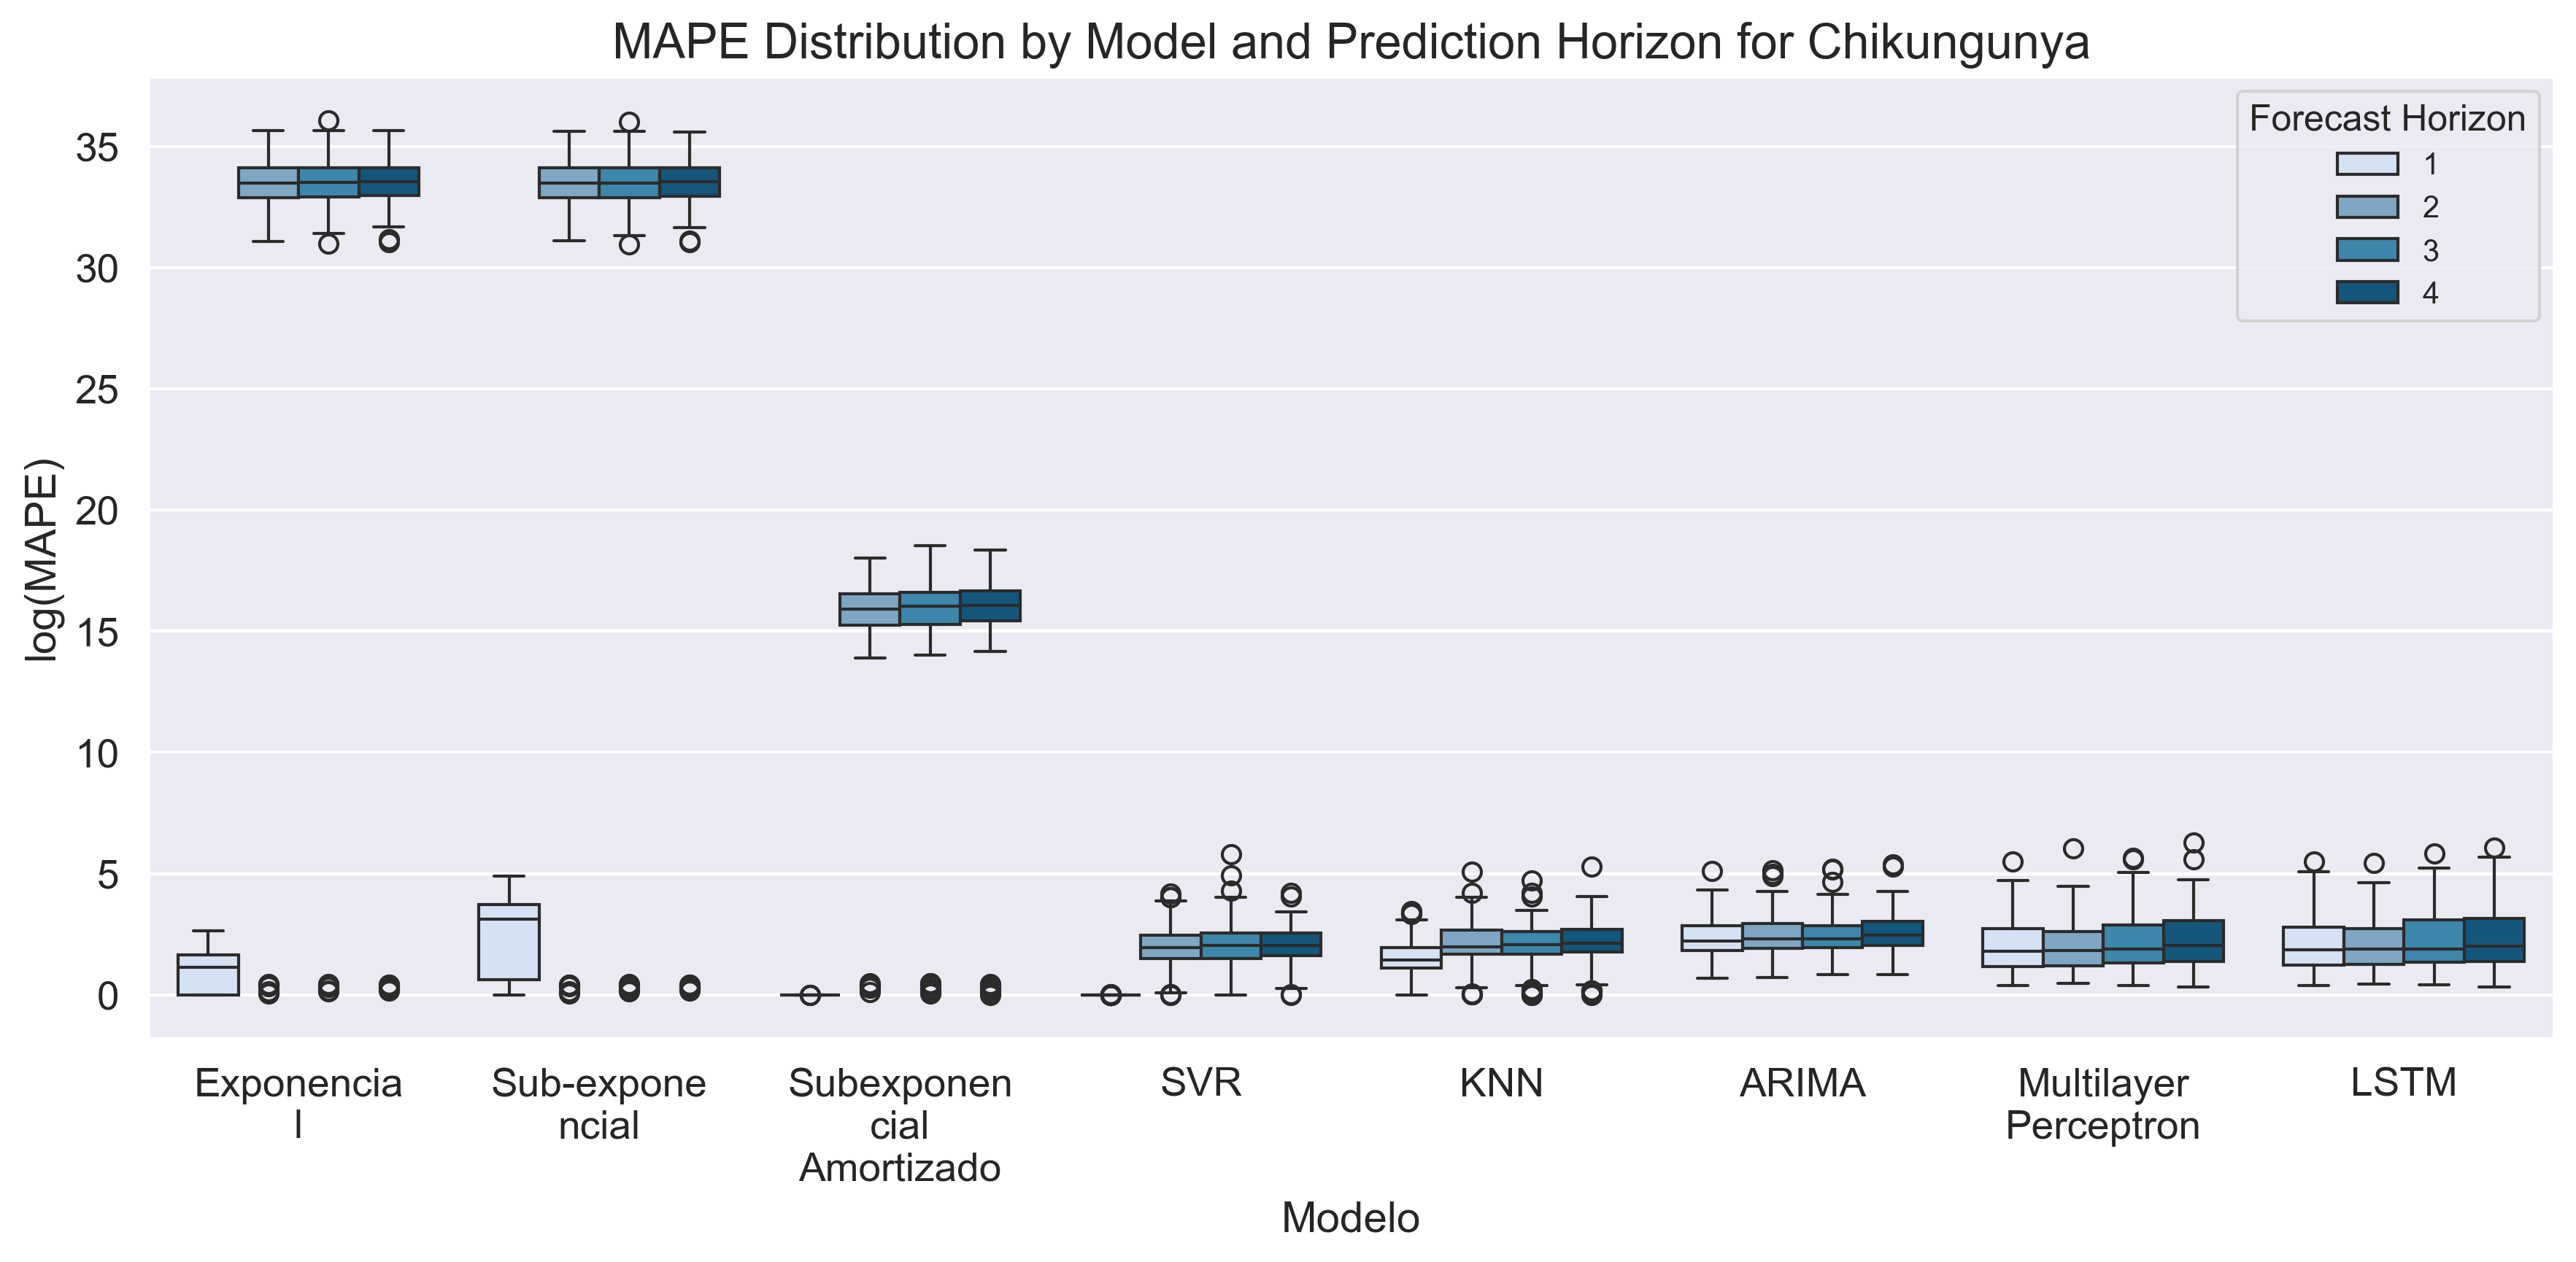

/var/folders/bx/bkqd8jm57437t30_zs7693sm0000gn/T/ipykernel_48087/1642100494.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


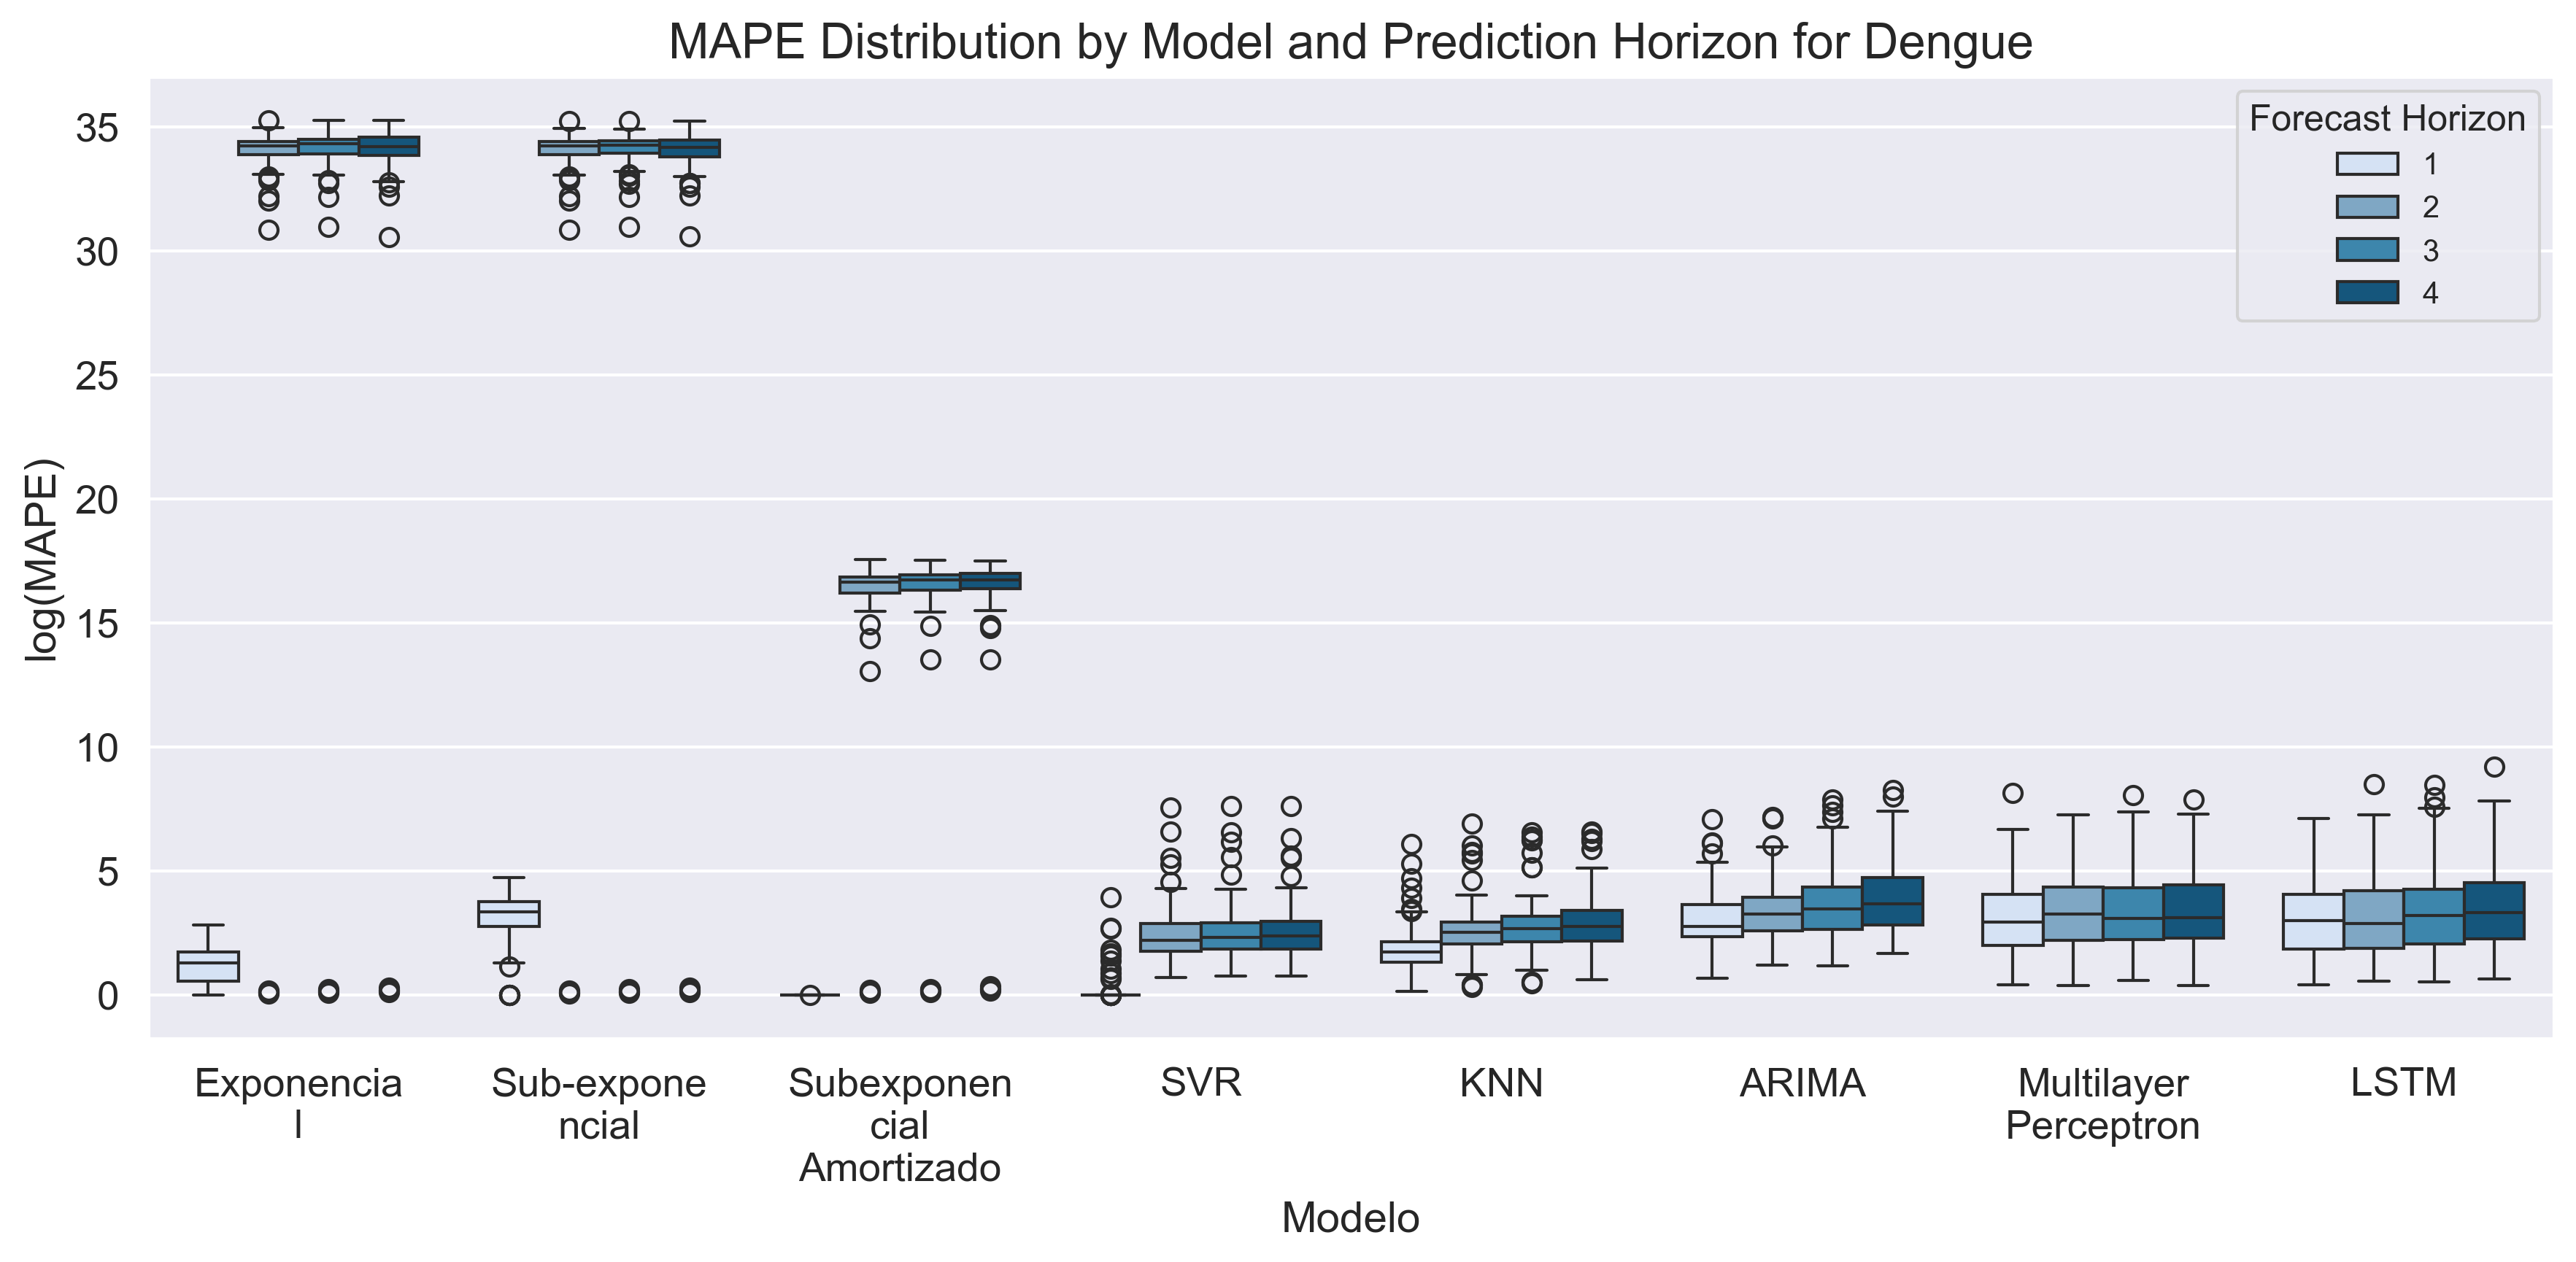

In [23]:
df['log_MAPE'] = np.log1p(df['MAPE'])
# Colores personalizados
palette = {1:"#d0e1f9", 2:"#74a9cf", 3:"#2b8cbe", 4:"#045a8d"}
for disease in ['chikungunya','dengue']:
    plt.figure(figsize=(12, 6))
    orden_metodos = ["exponential", "subexponential", "subexponential amortized",
                     "svr", "knn", "autoarima", "mlp", "lstm"]

    ax = sns.boxplot(
        data=df[df['Disease'] == disease],
        x="Method",
        y="log_MAPE",
        hue="Prediction Weeks",
        palette=palette,
        order= orden_metodos
    )

    # Cambiar etiquetas del eje X a nombres más descriptivos
    new_labels = {
        "exponential": "Exponencial",
        "subexponential": "Sub-exponencial",
        "subexponential amortized": "Subexponencial Amortizado",
        "autoarima": "ARIMA",
        "svr": "SVR",
        "knn": "KNN",
        "mlp": "Multilayer Perceptron",
        "lstm": "LSTM",

    }

    # Obtener las posiciones y aplicar los nuevos labels
    labels = [textwrap.fill(new_labels.get(label.get_text(), label.get_text()), width=10)
              for label in ax.get_xticklabels()]
    ax.set_xticklabels(labels)

    # Títulos y etiquetas
    ax.set_title(f"MAPE Distribution by Model and Prediction Horizon for {disease.capitalize()}", fontsize=16)
    ax.set_xlabel("Modelo", fontsize=14)
    ax.set_ylabel("log(MAPE)", fontsize=14)

    # Leyenda más clara
    ax.legend(title="Forecast Horizon", title_fontsize=12, fontsize=10)

    plt.tight_layout()
    plt.savefig(f"boxplot_mape_method_disease_{disease}.svg", dpi=300)
    plt.show()

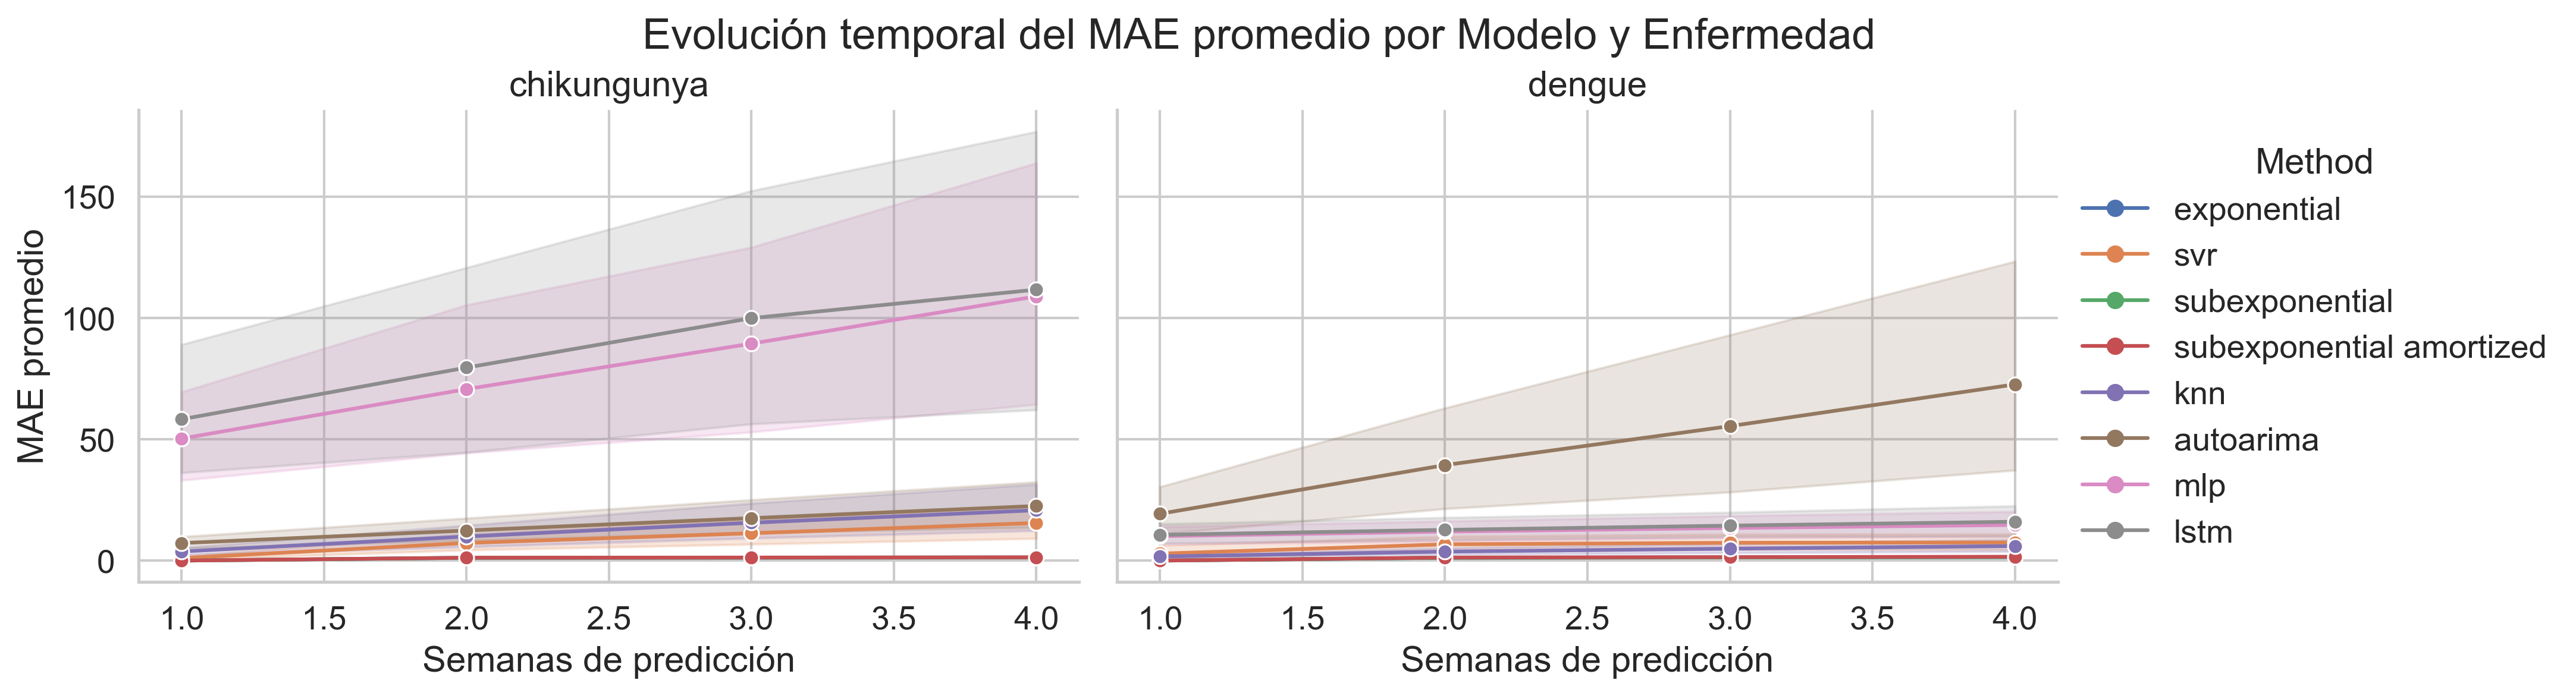

In [48]:
# LINEPLOT: MAE promedio por semanas de predicción (evolución temporal), facet por Disease
g = sns.relplot(
    data=df, x="Prediction Weeks", y="MAE", hue="Method", kind="line",
    col="Disease", col_wrap=2, height=4, aspect=1.5, marker="o"
)
g.set_titles("{col_name}")
g.set_axis_labels("Semanas de predicción", "MAE promedio")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Evolución temporal del MAE promedio por Modelo y Enfermedad")
plt.savefig("lineplot_mae_method_disease.png")
plt.show()

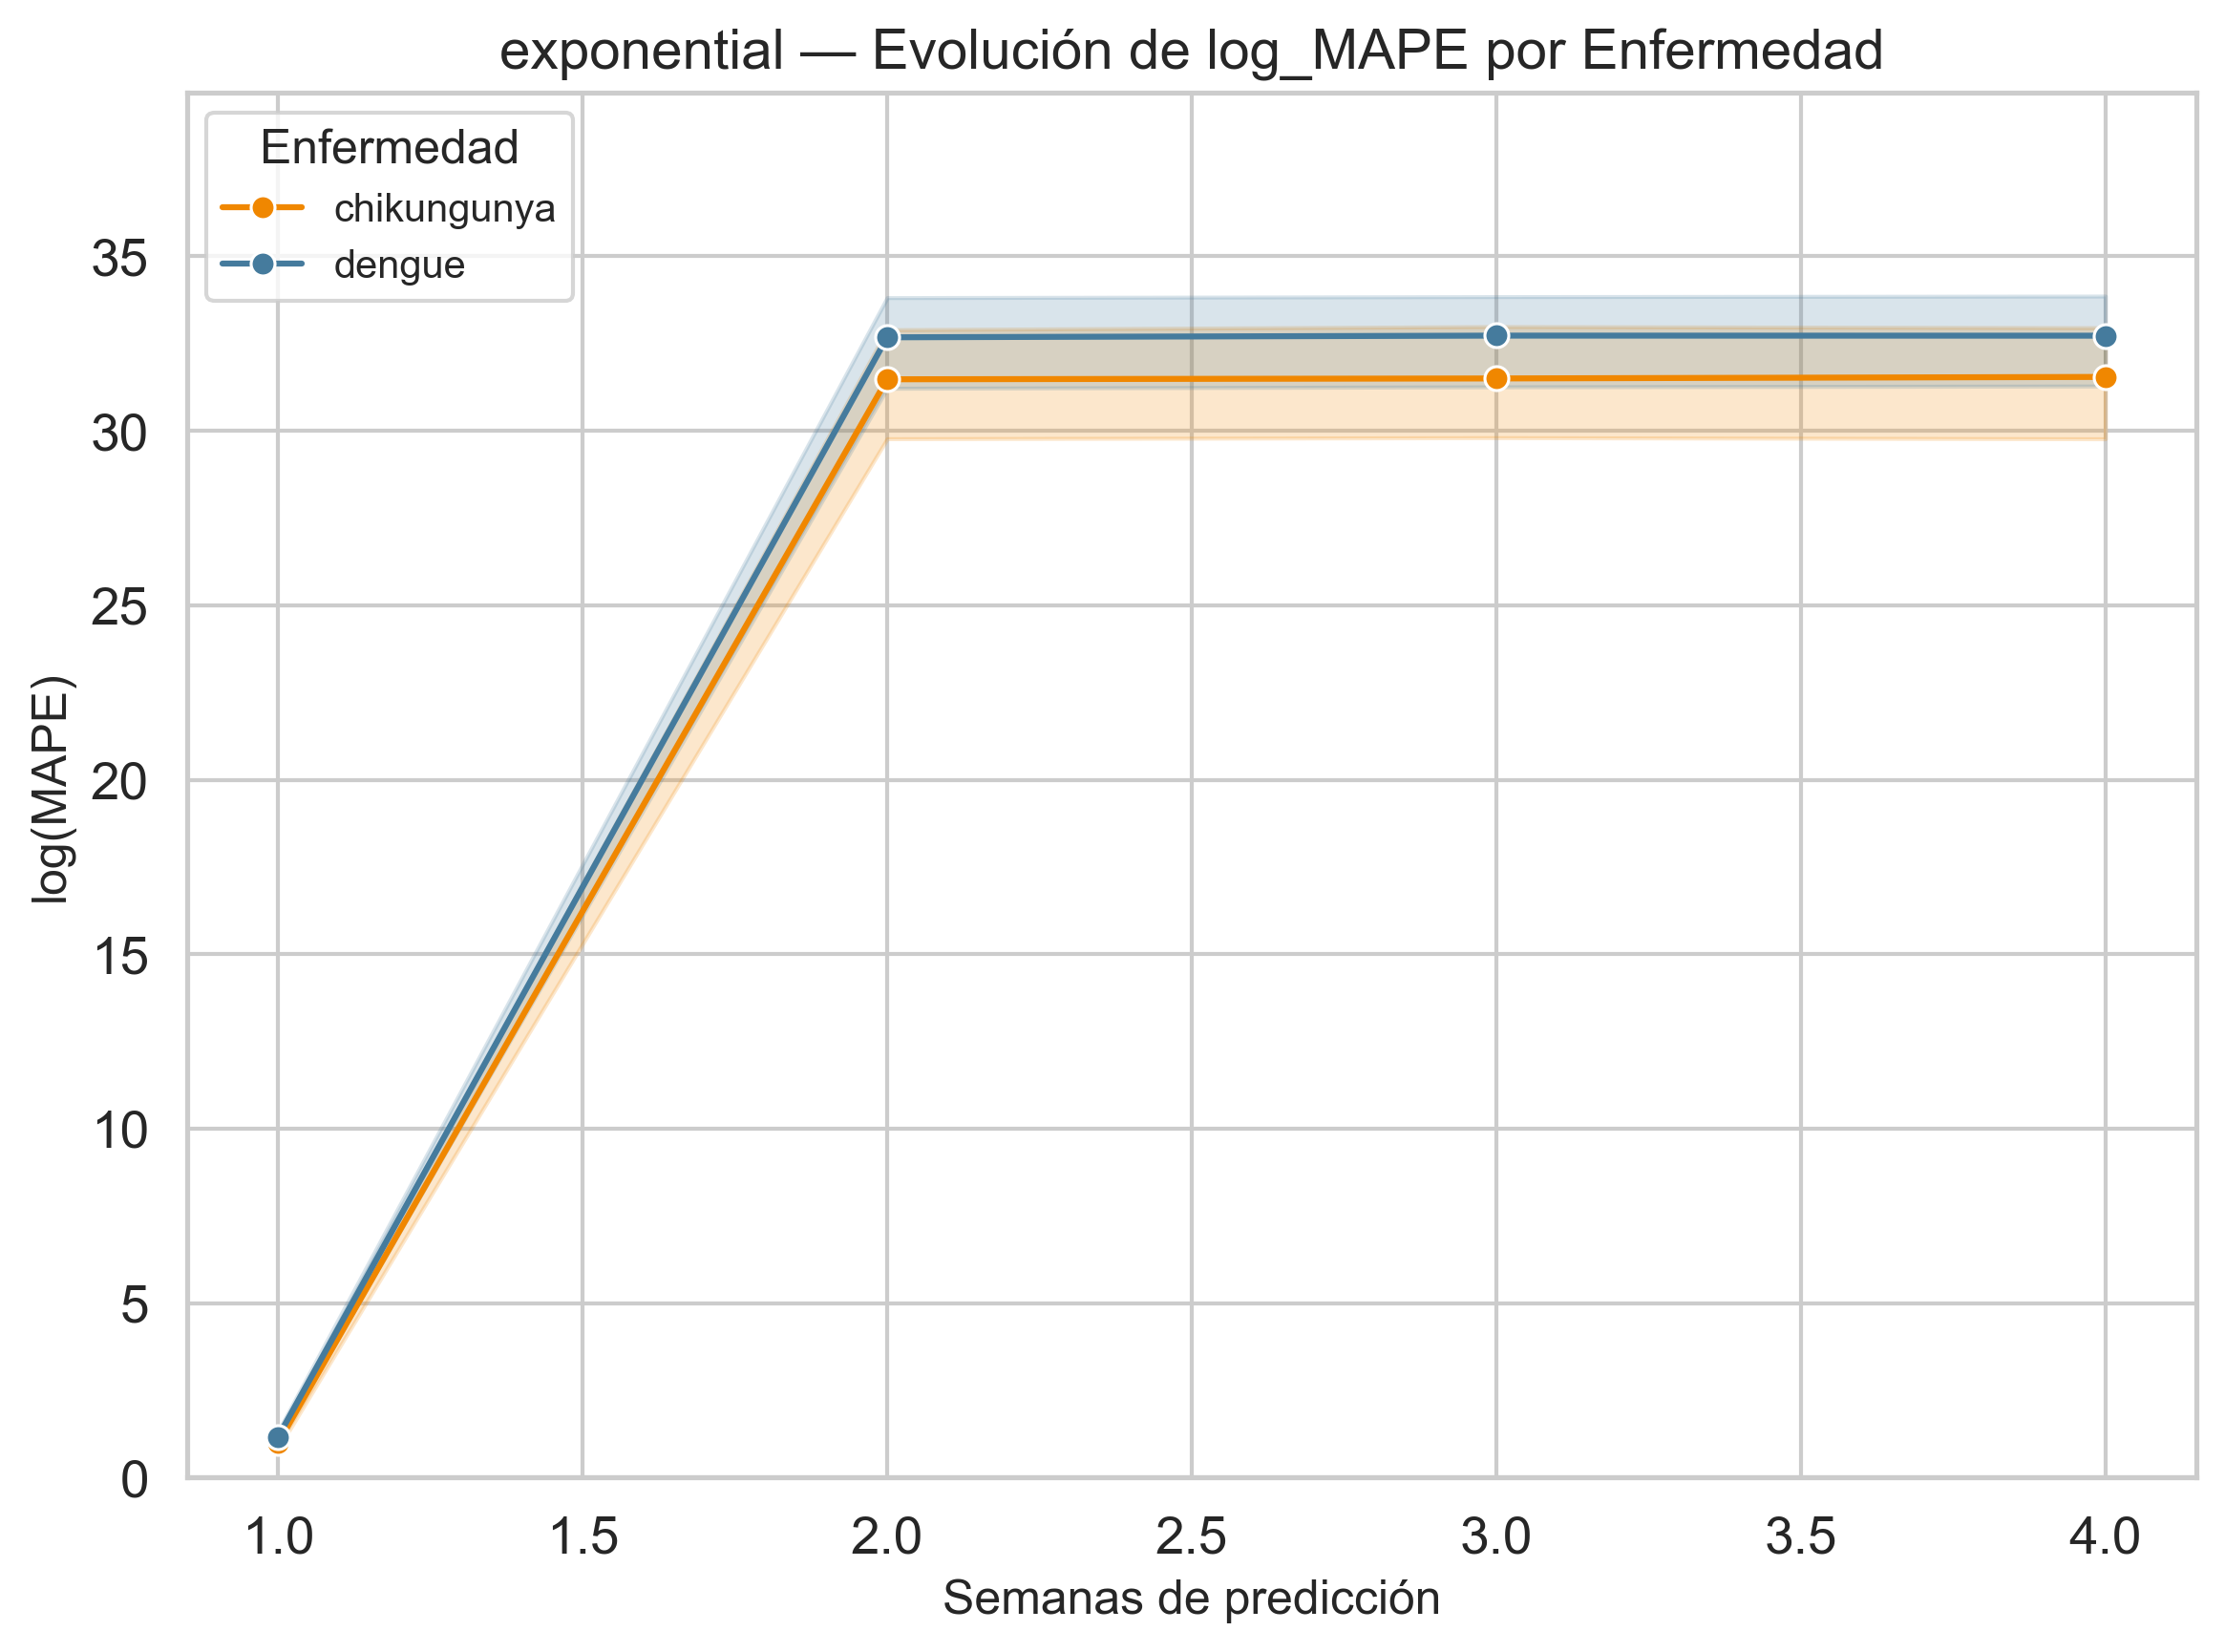

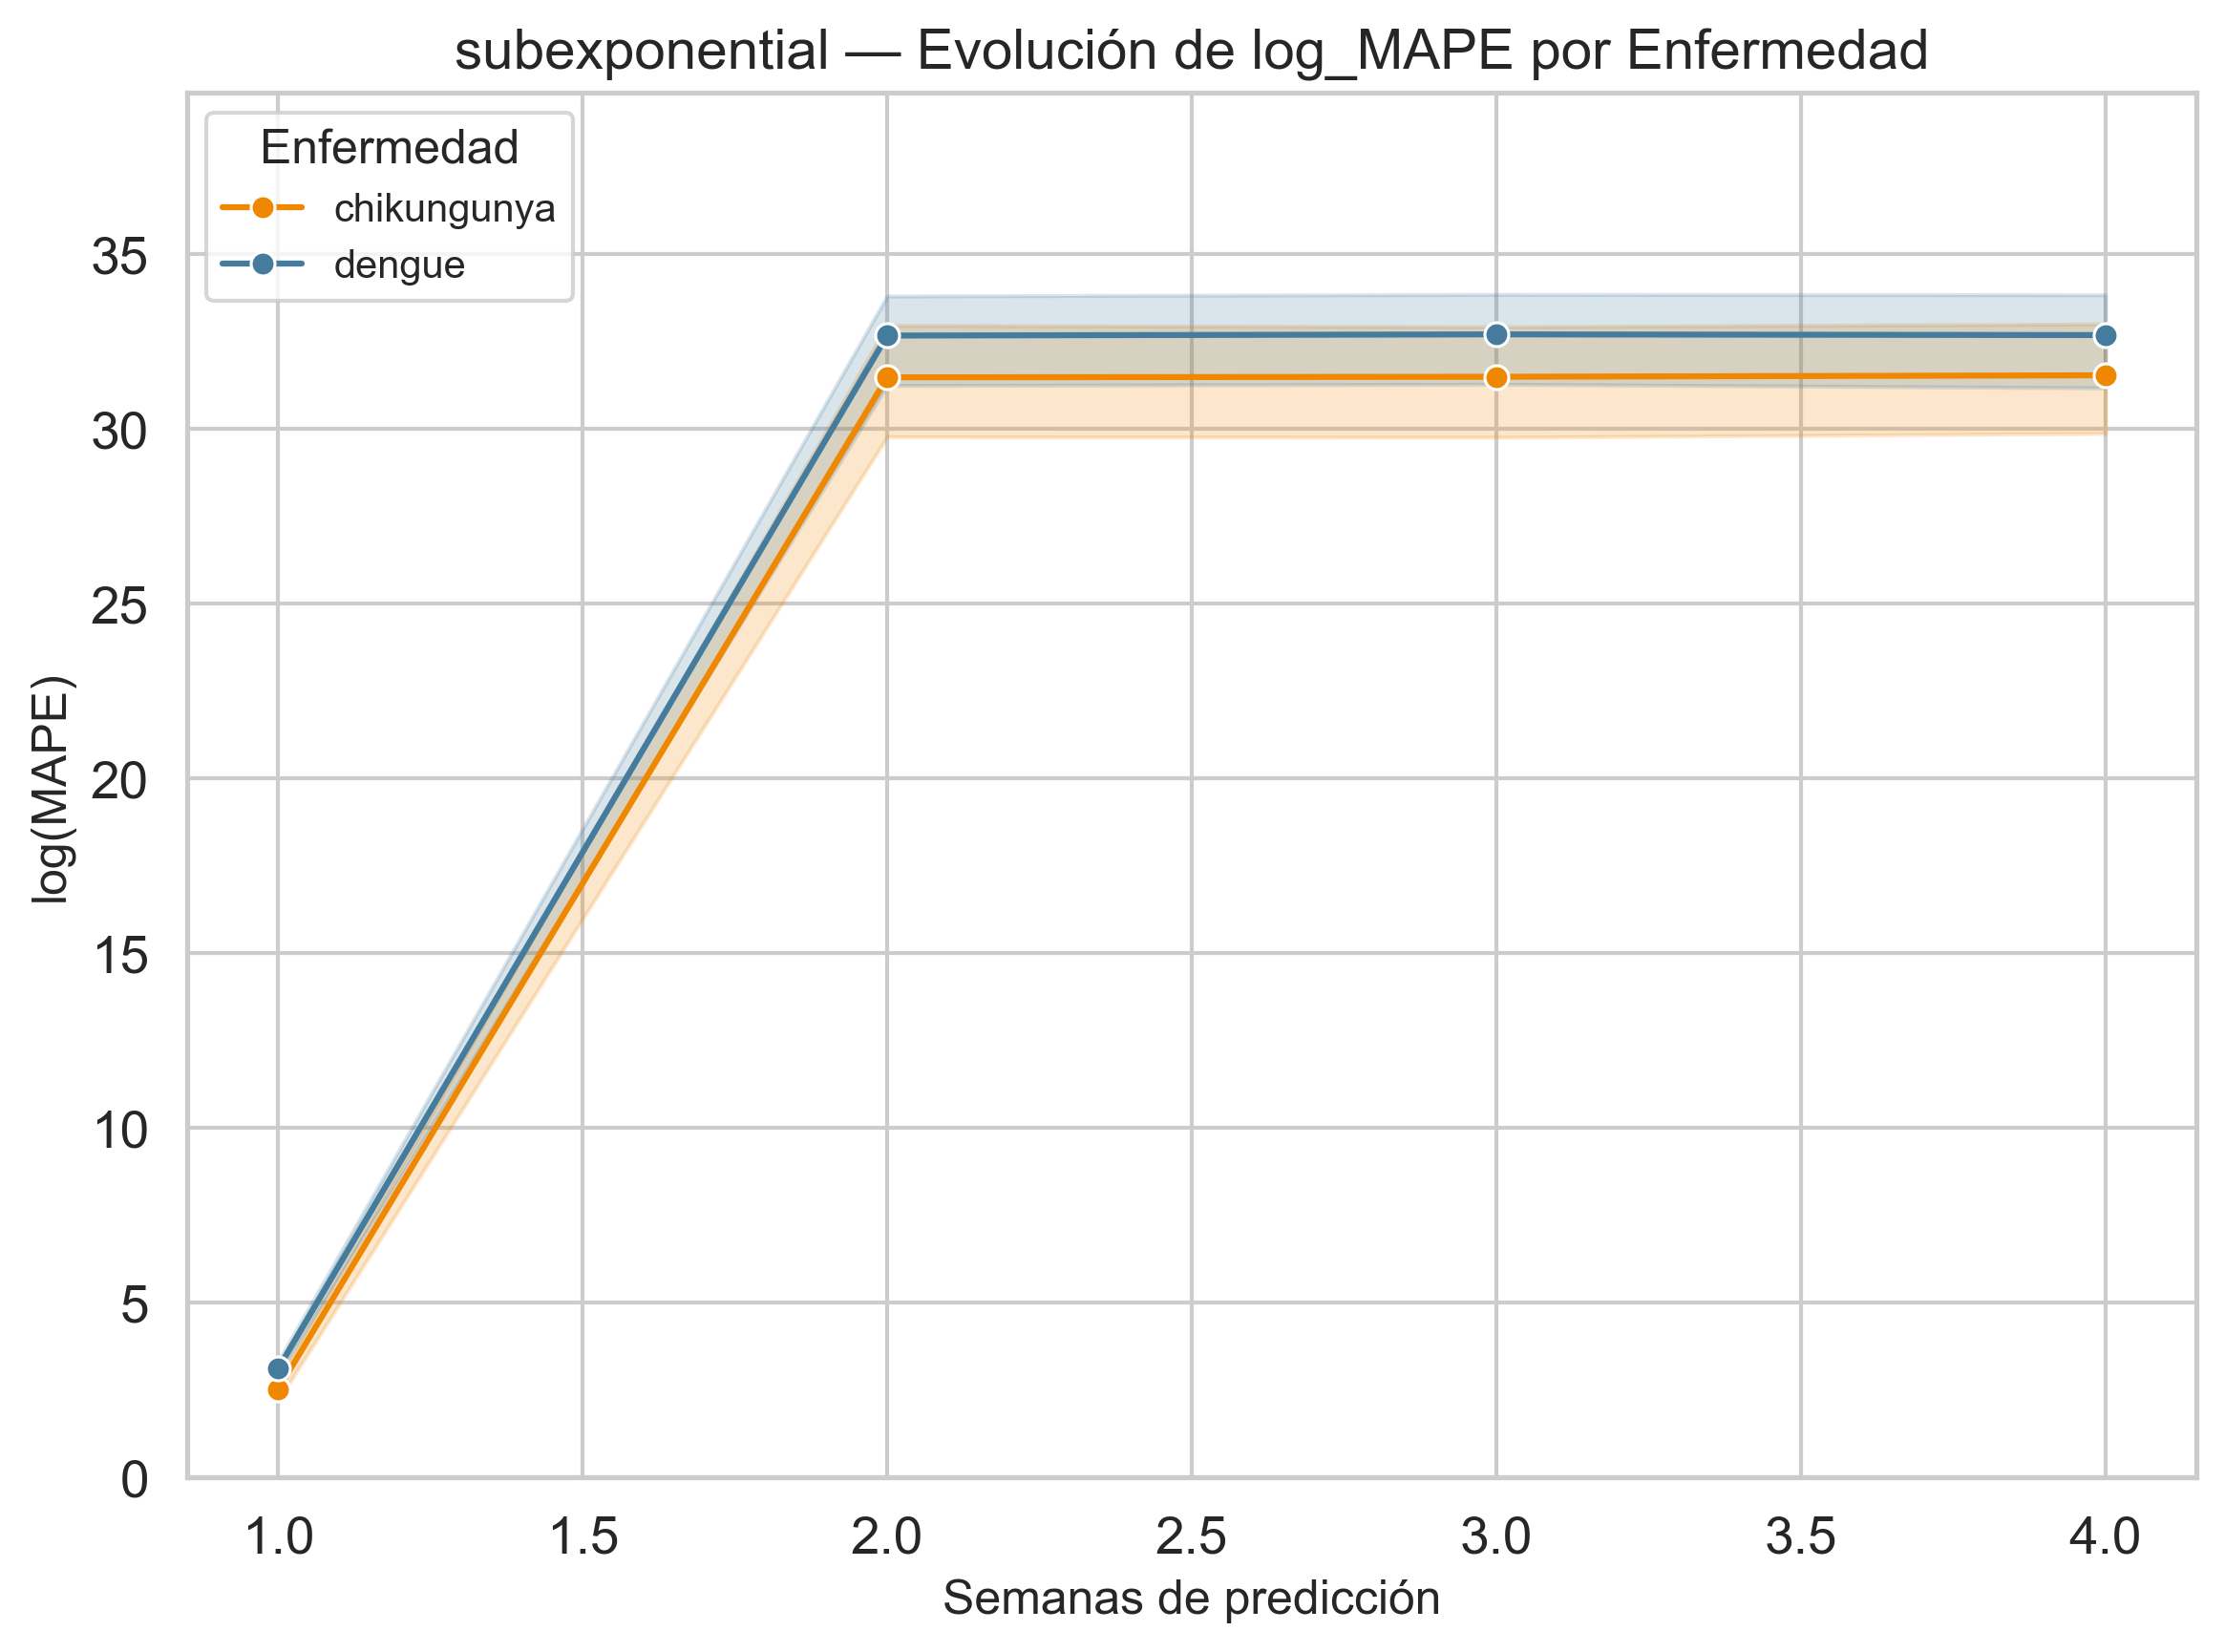

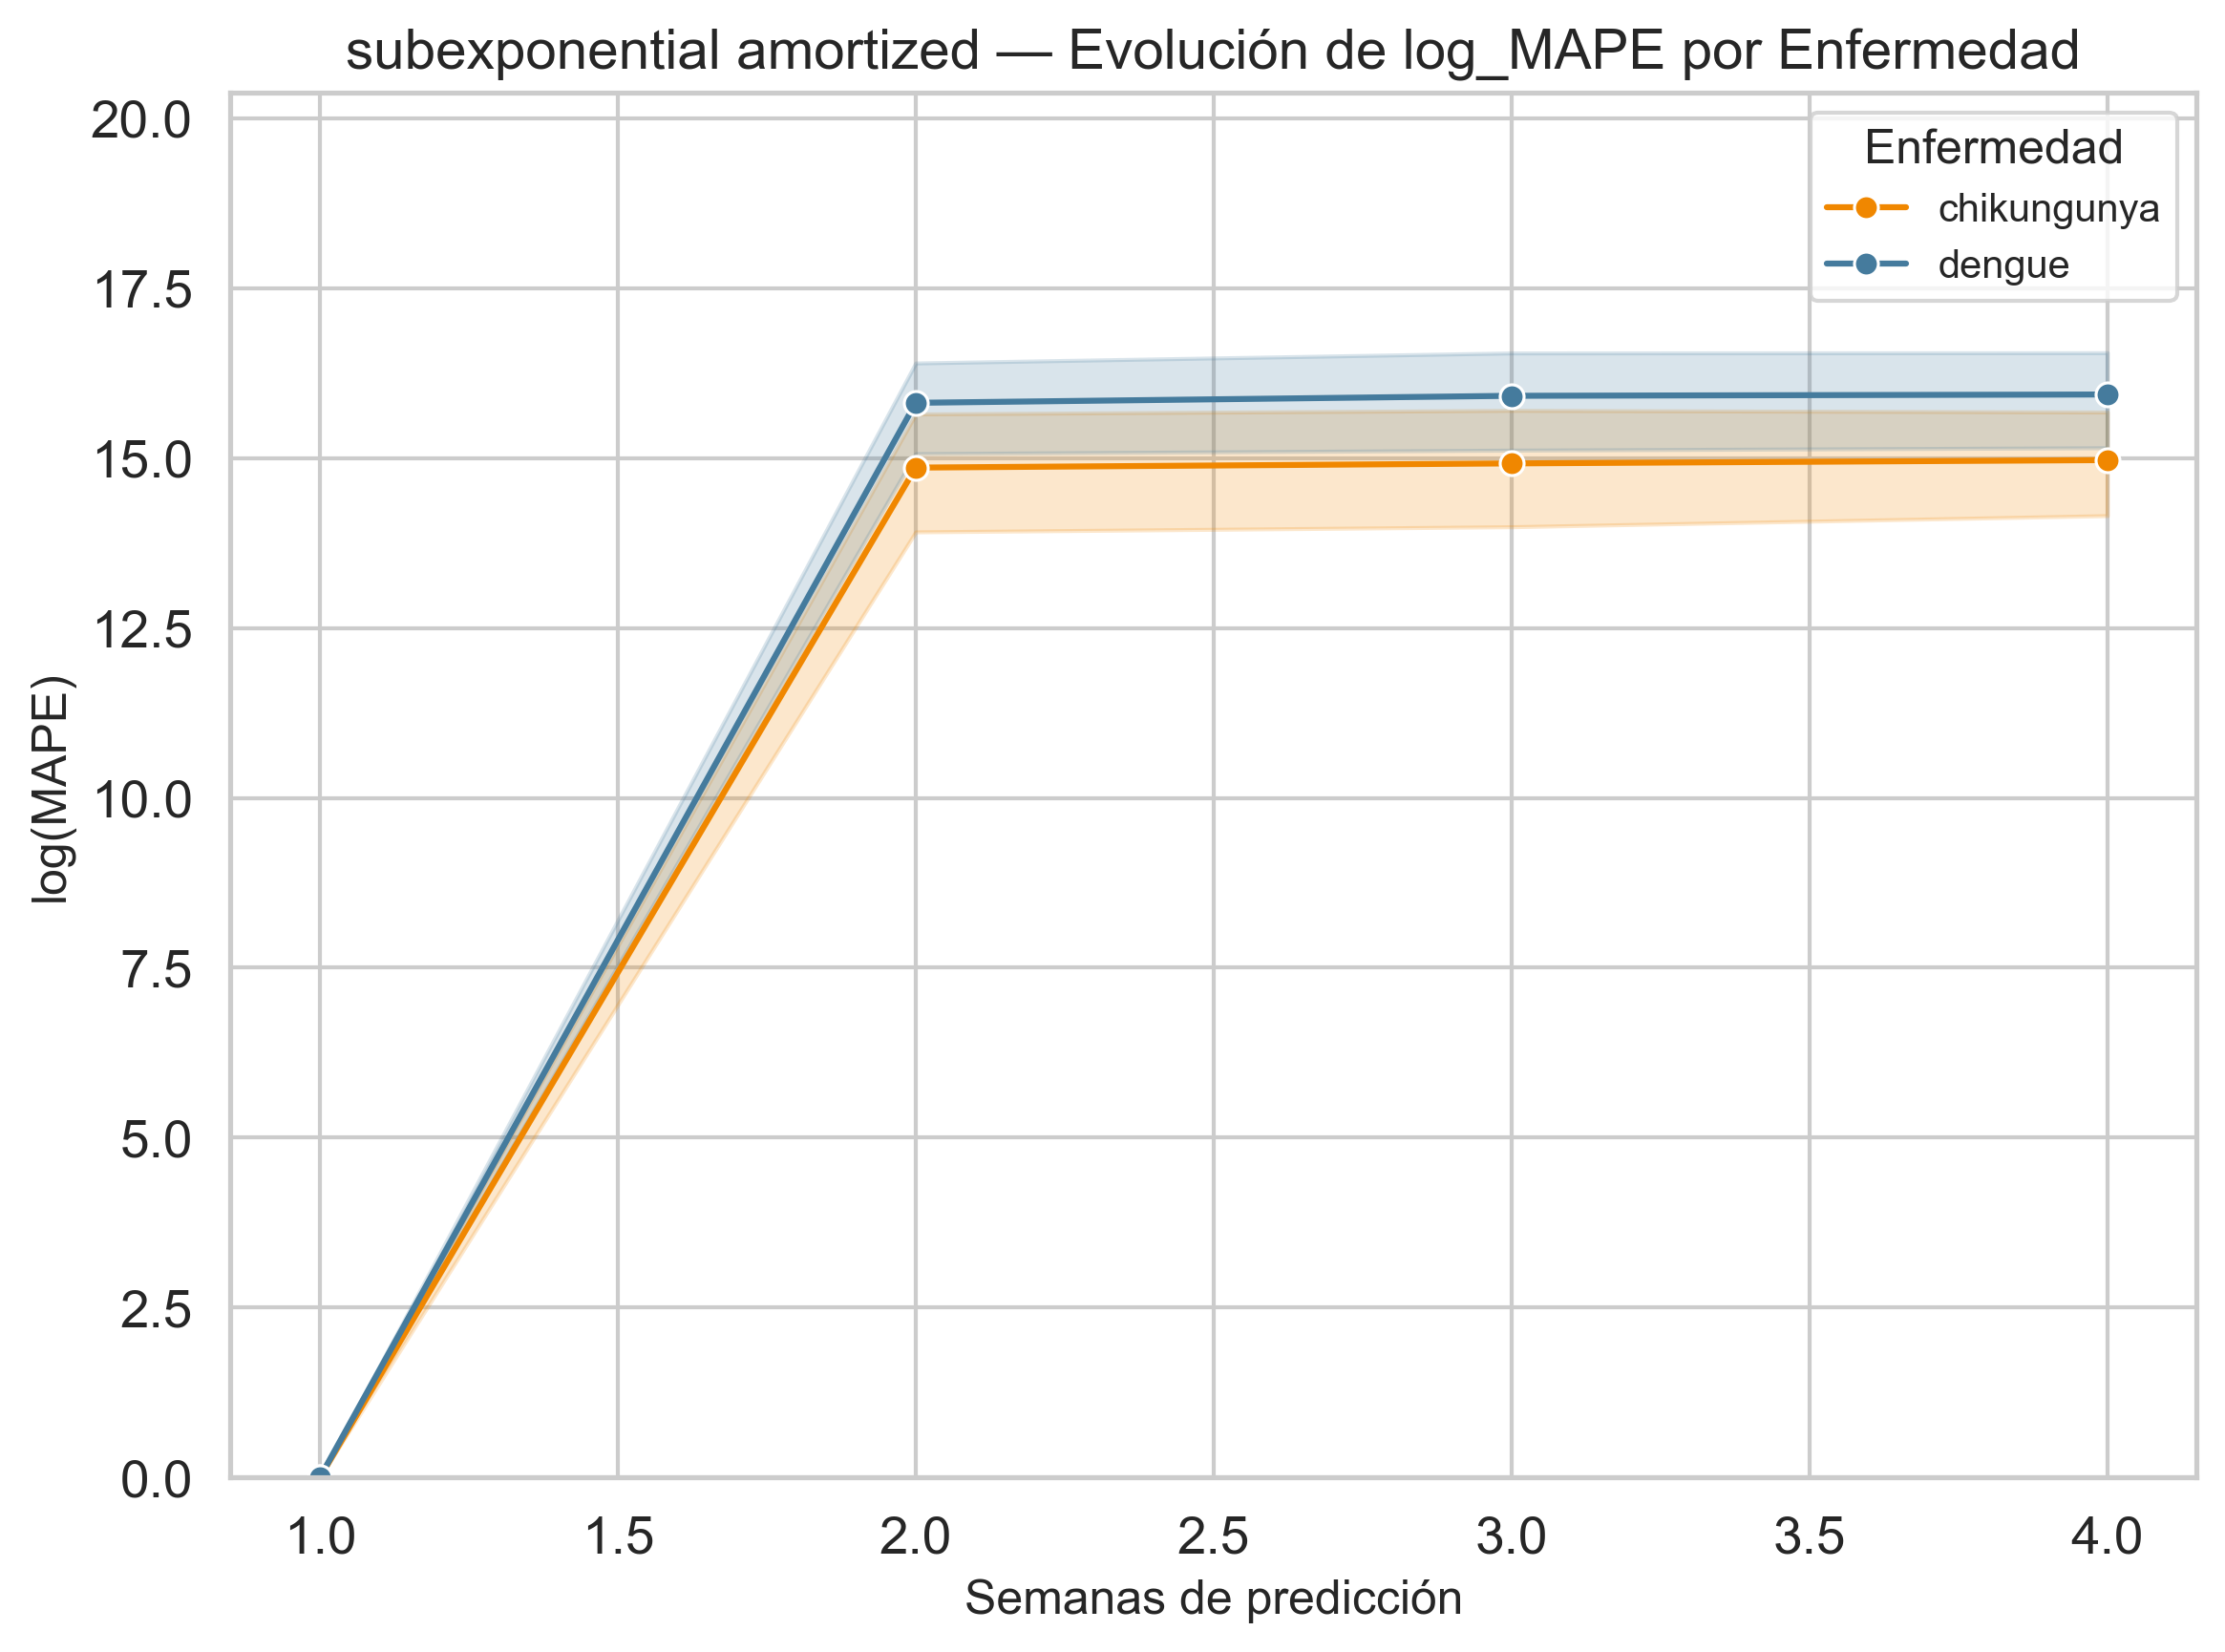

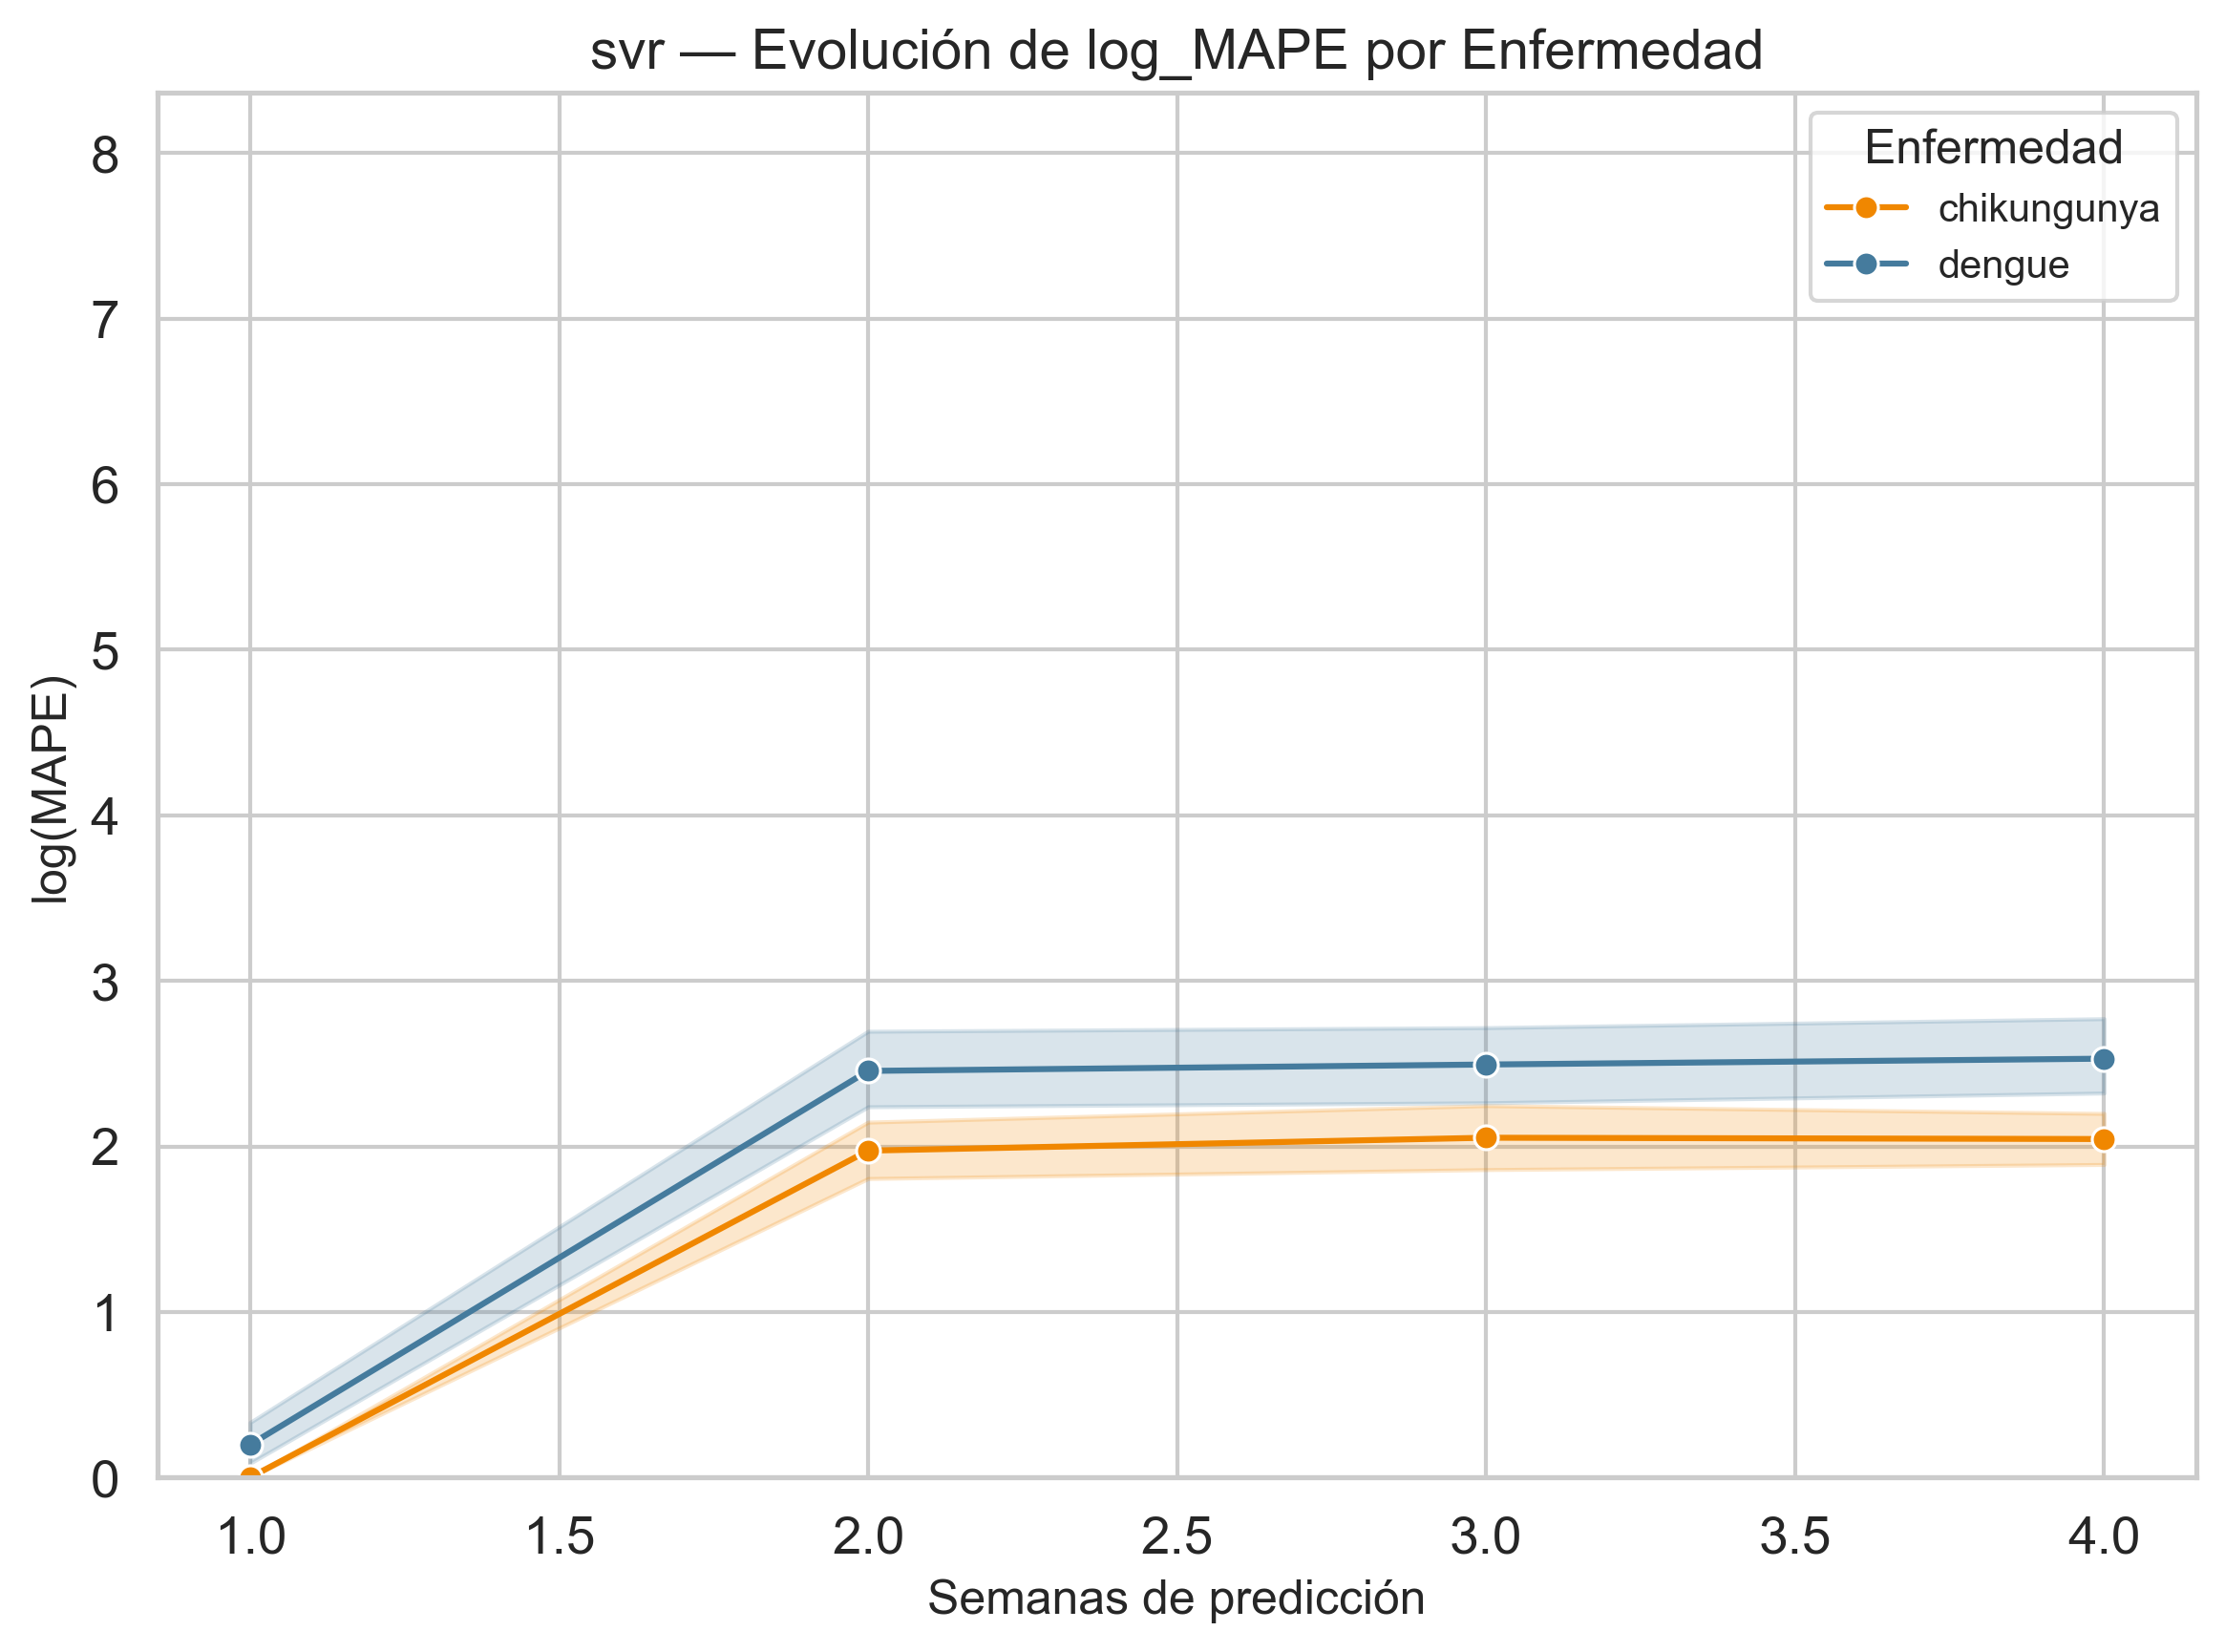

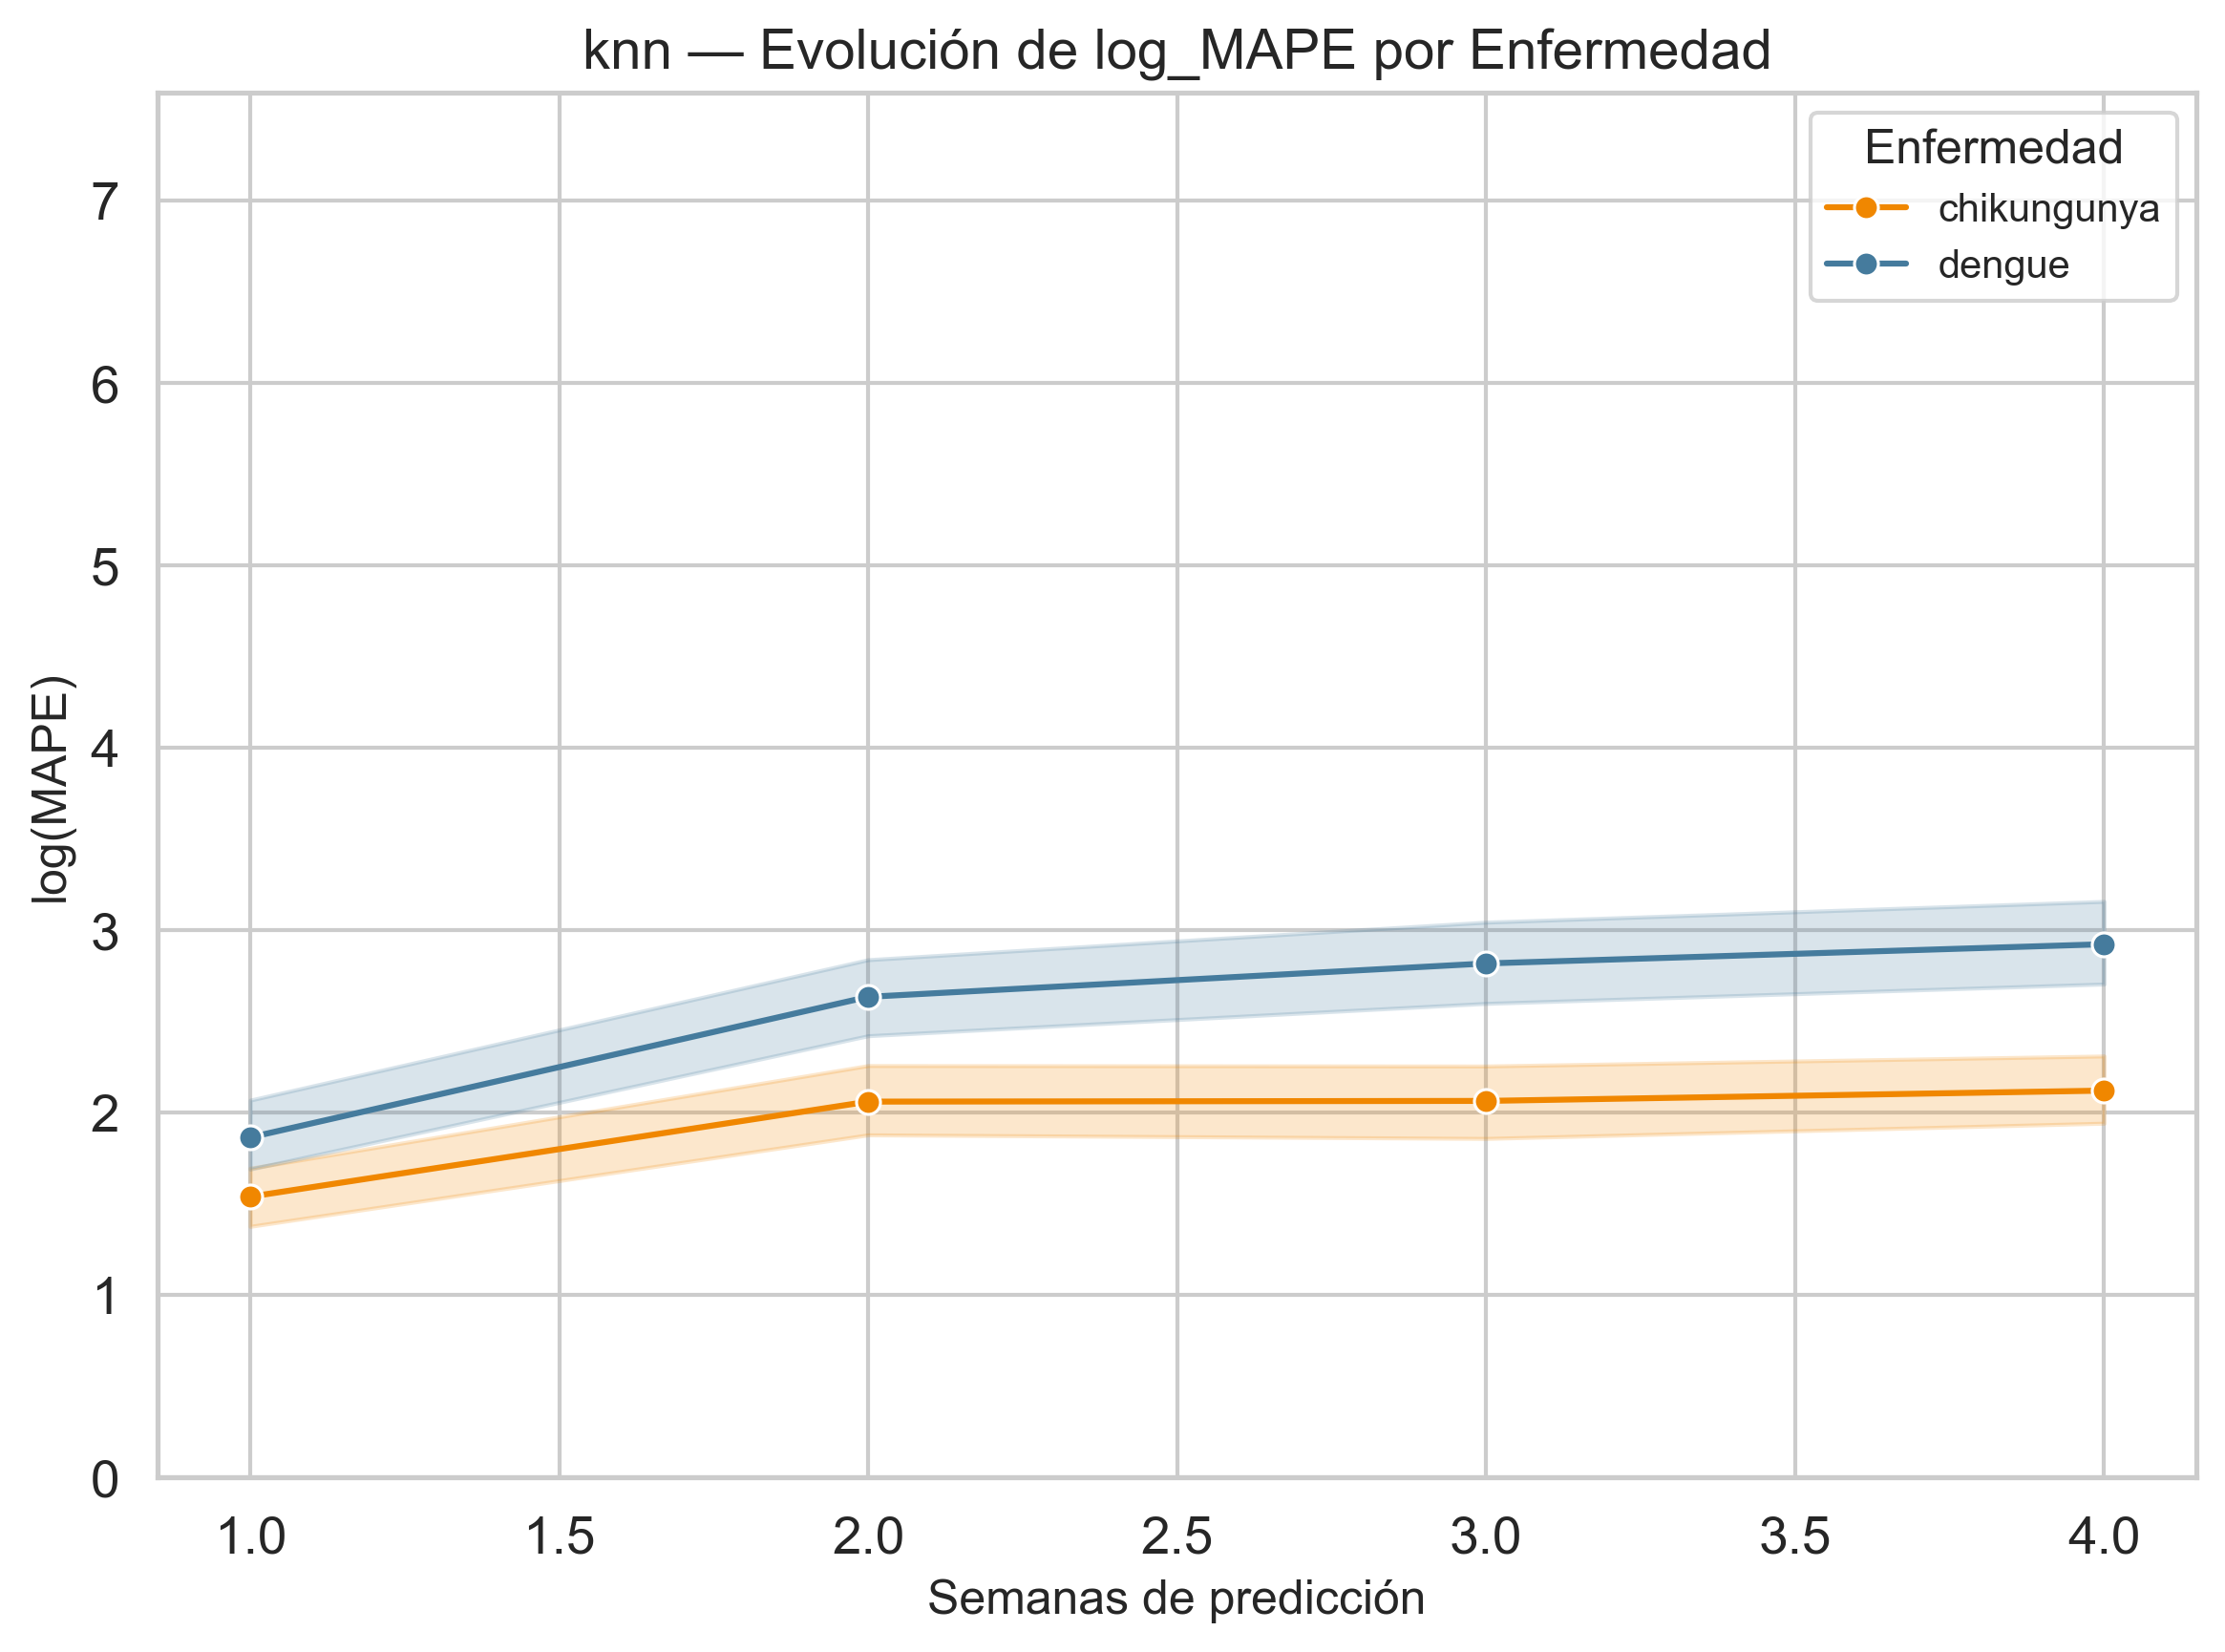

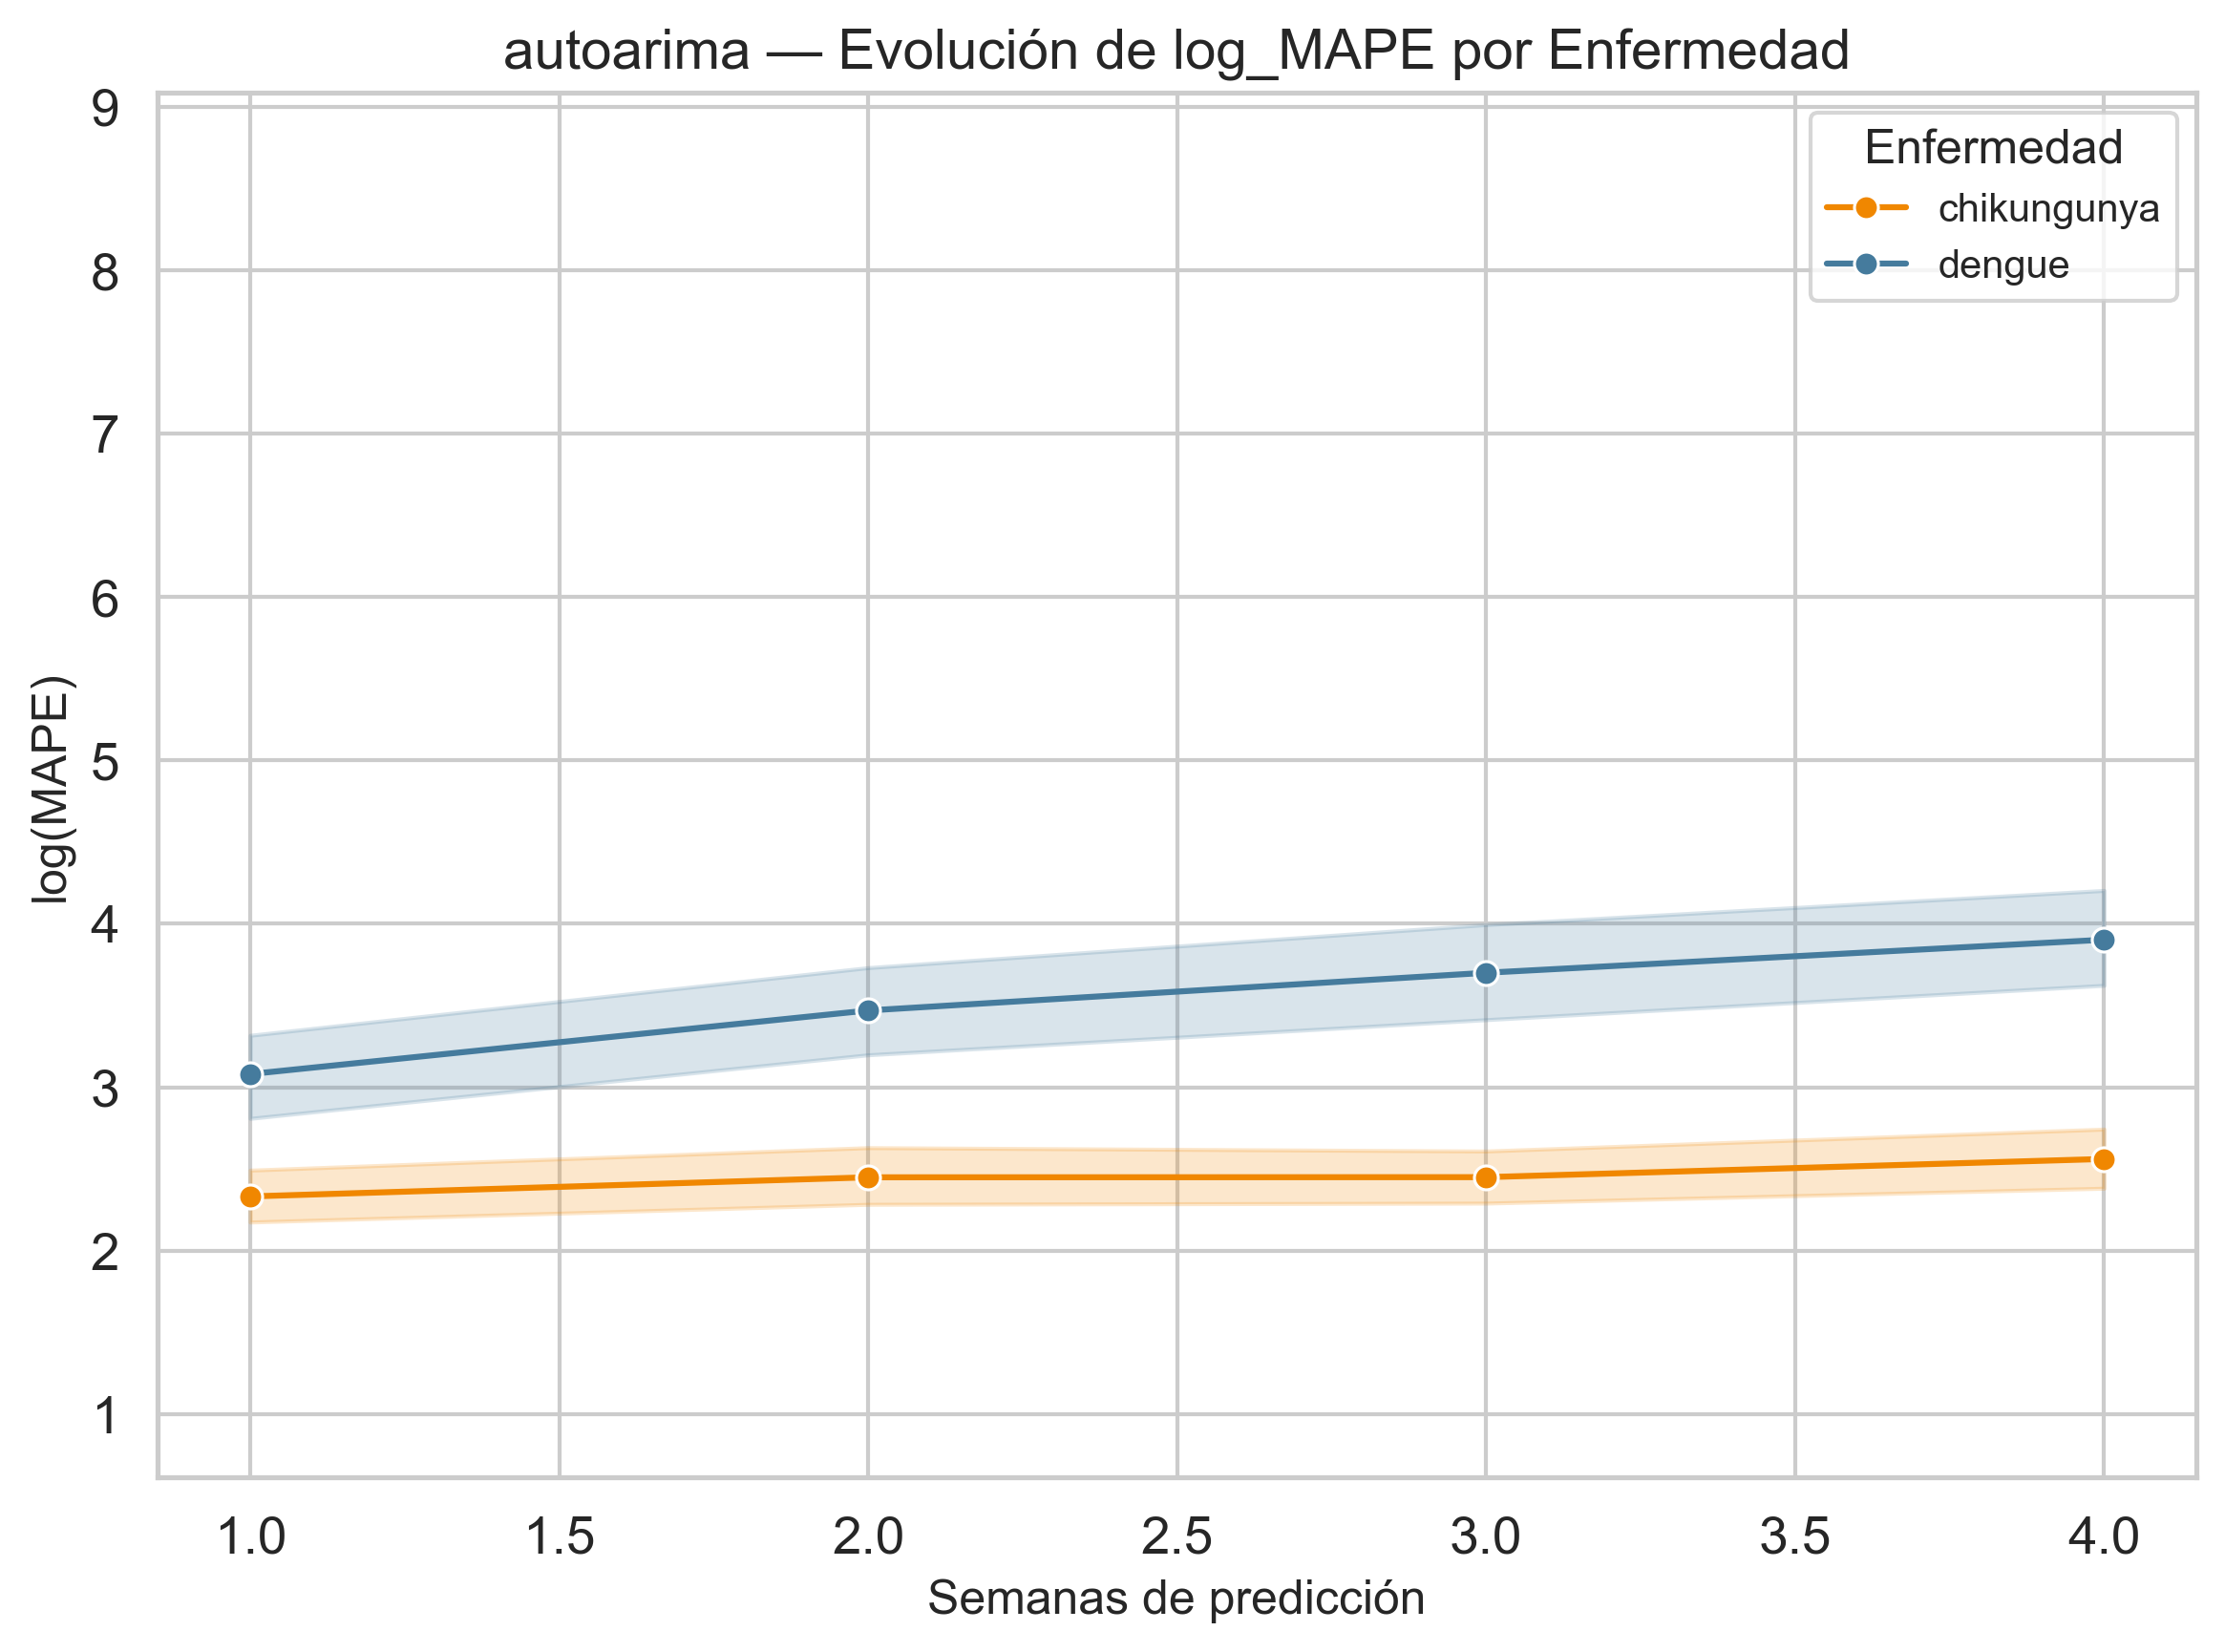

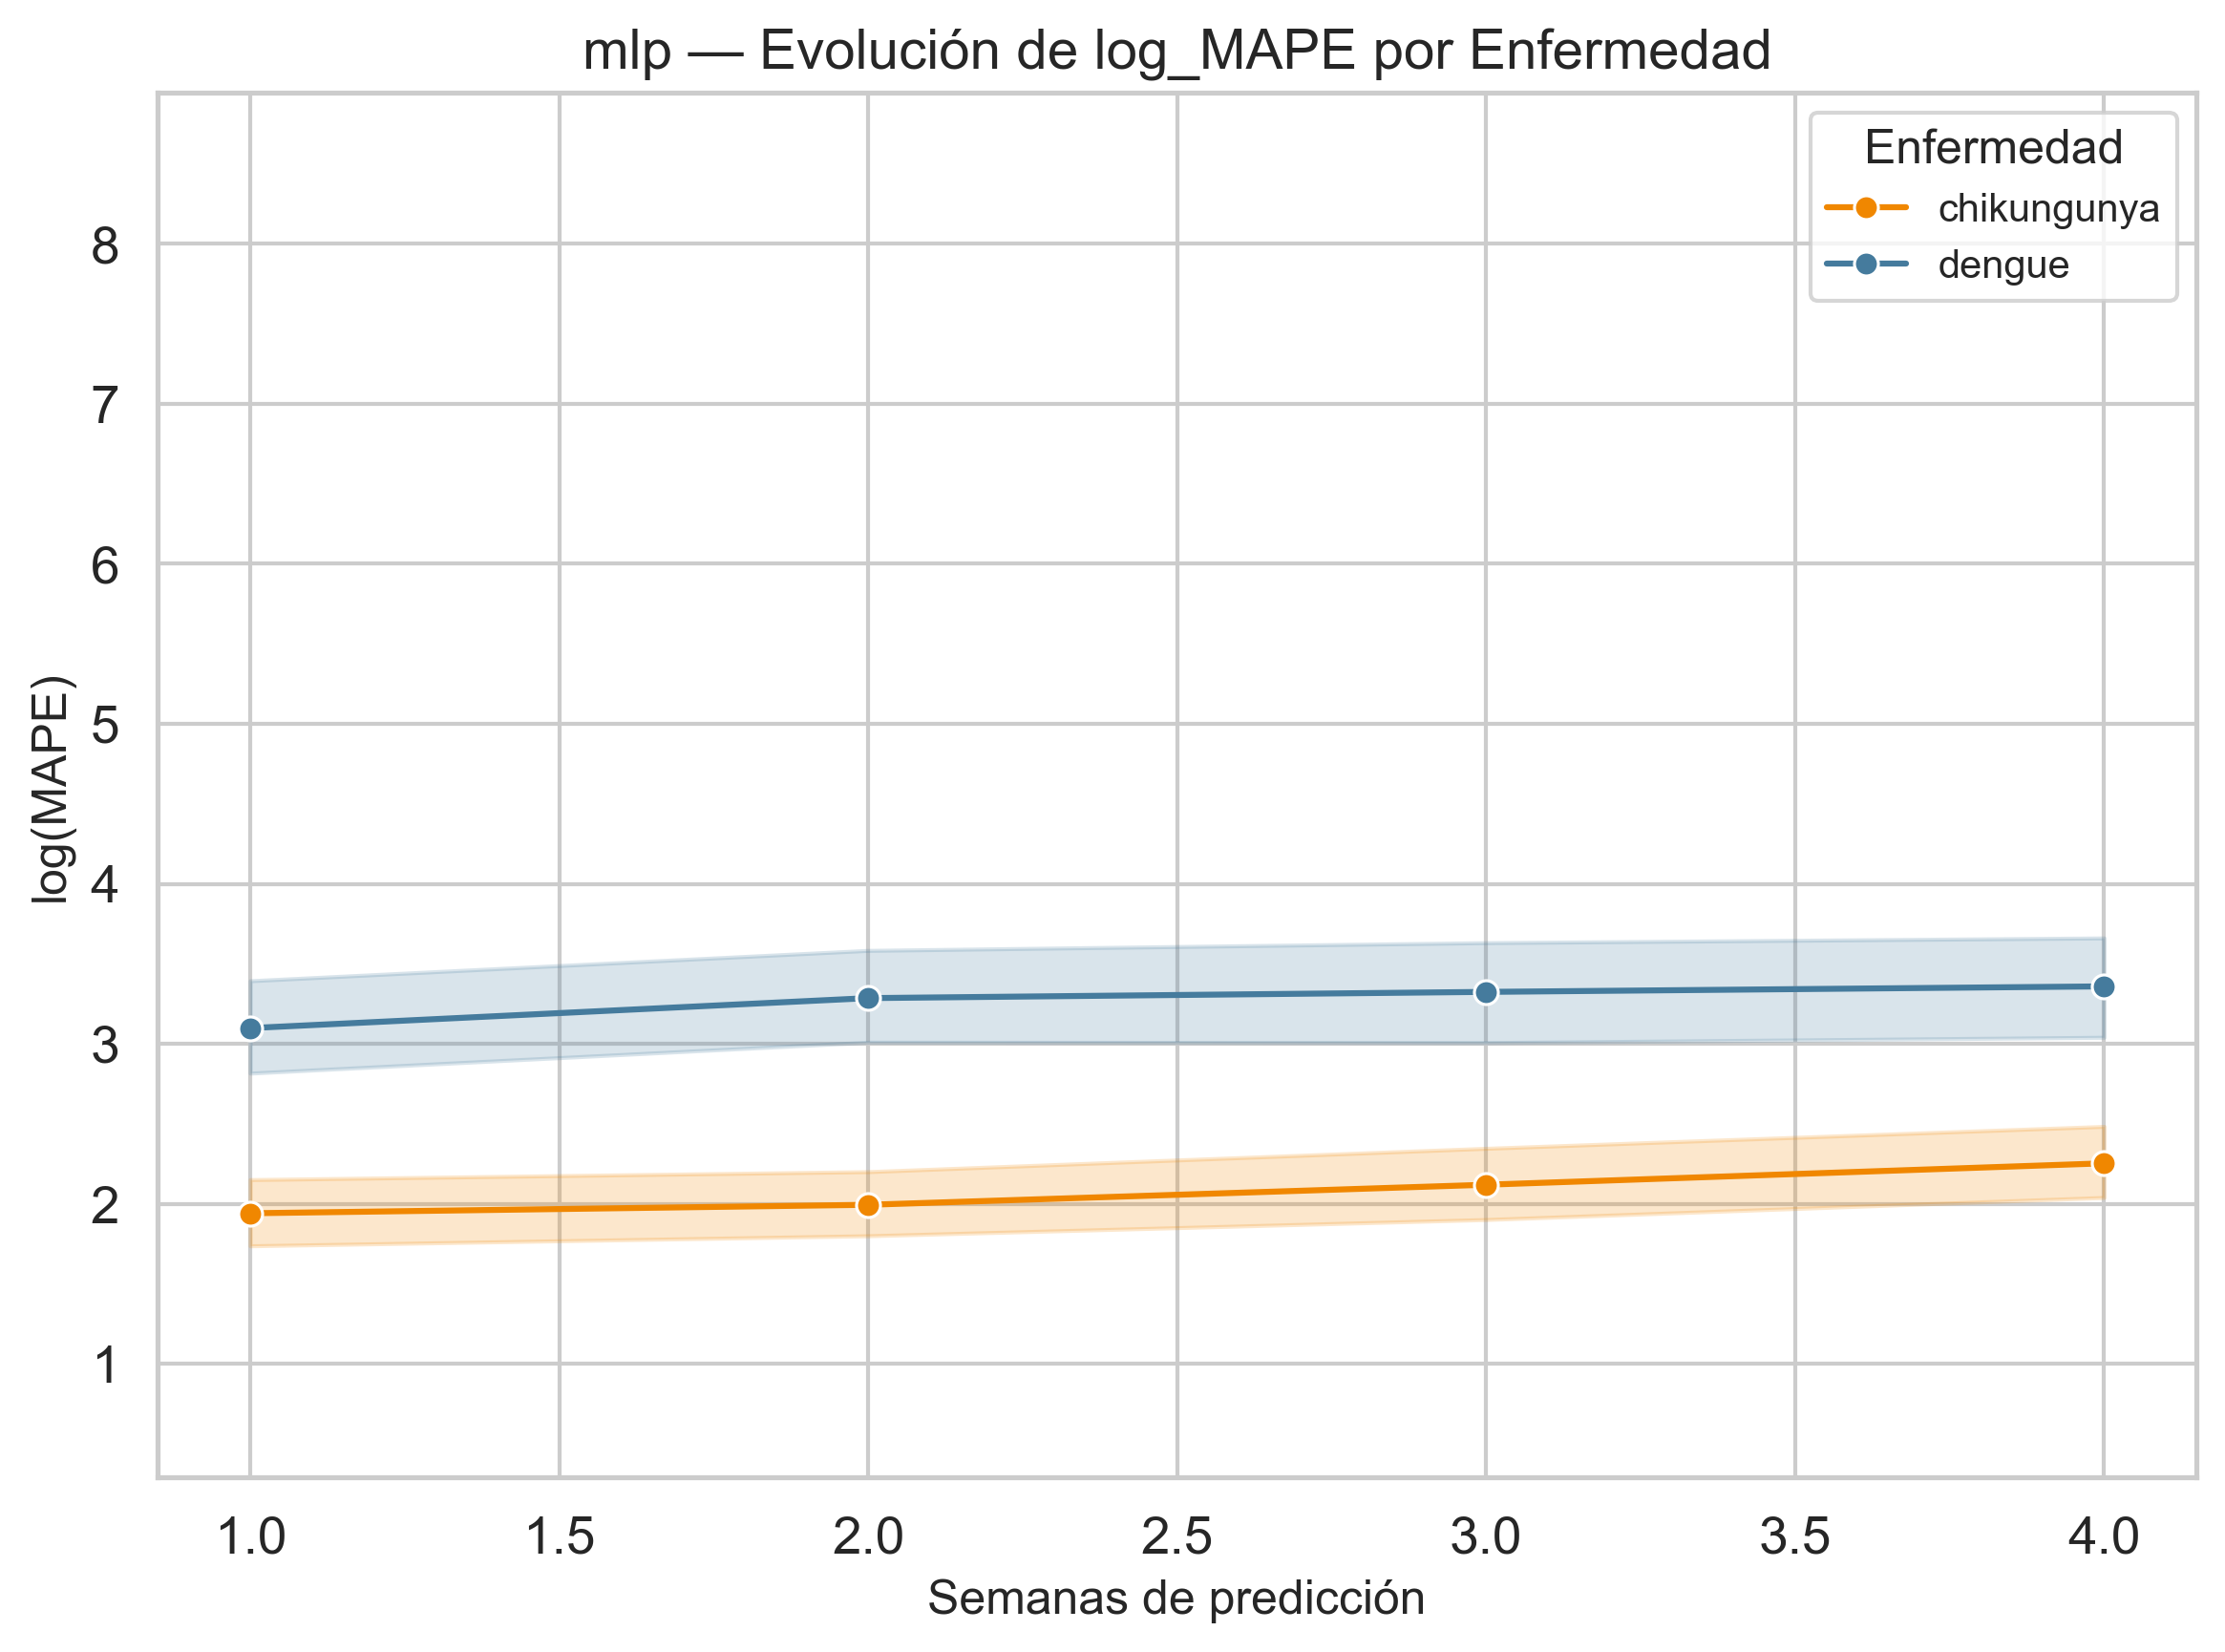

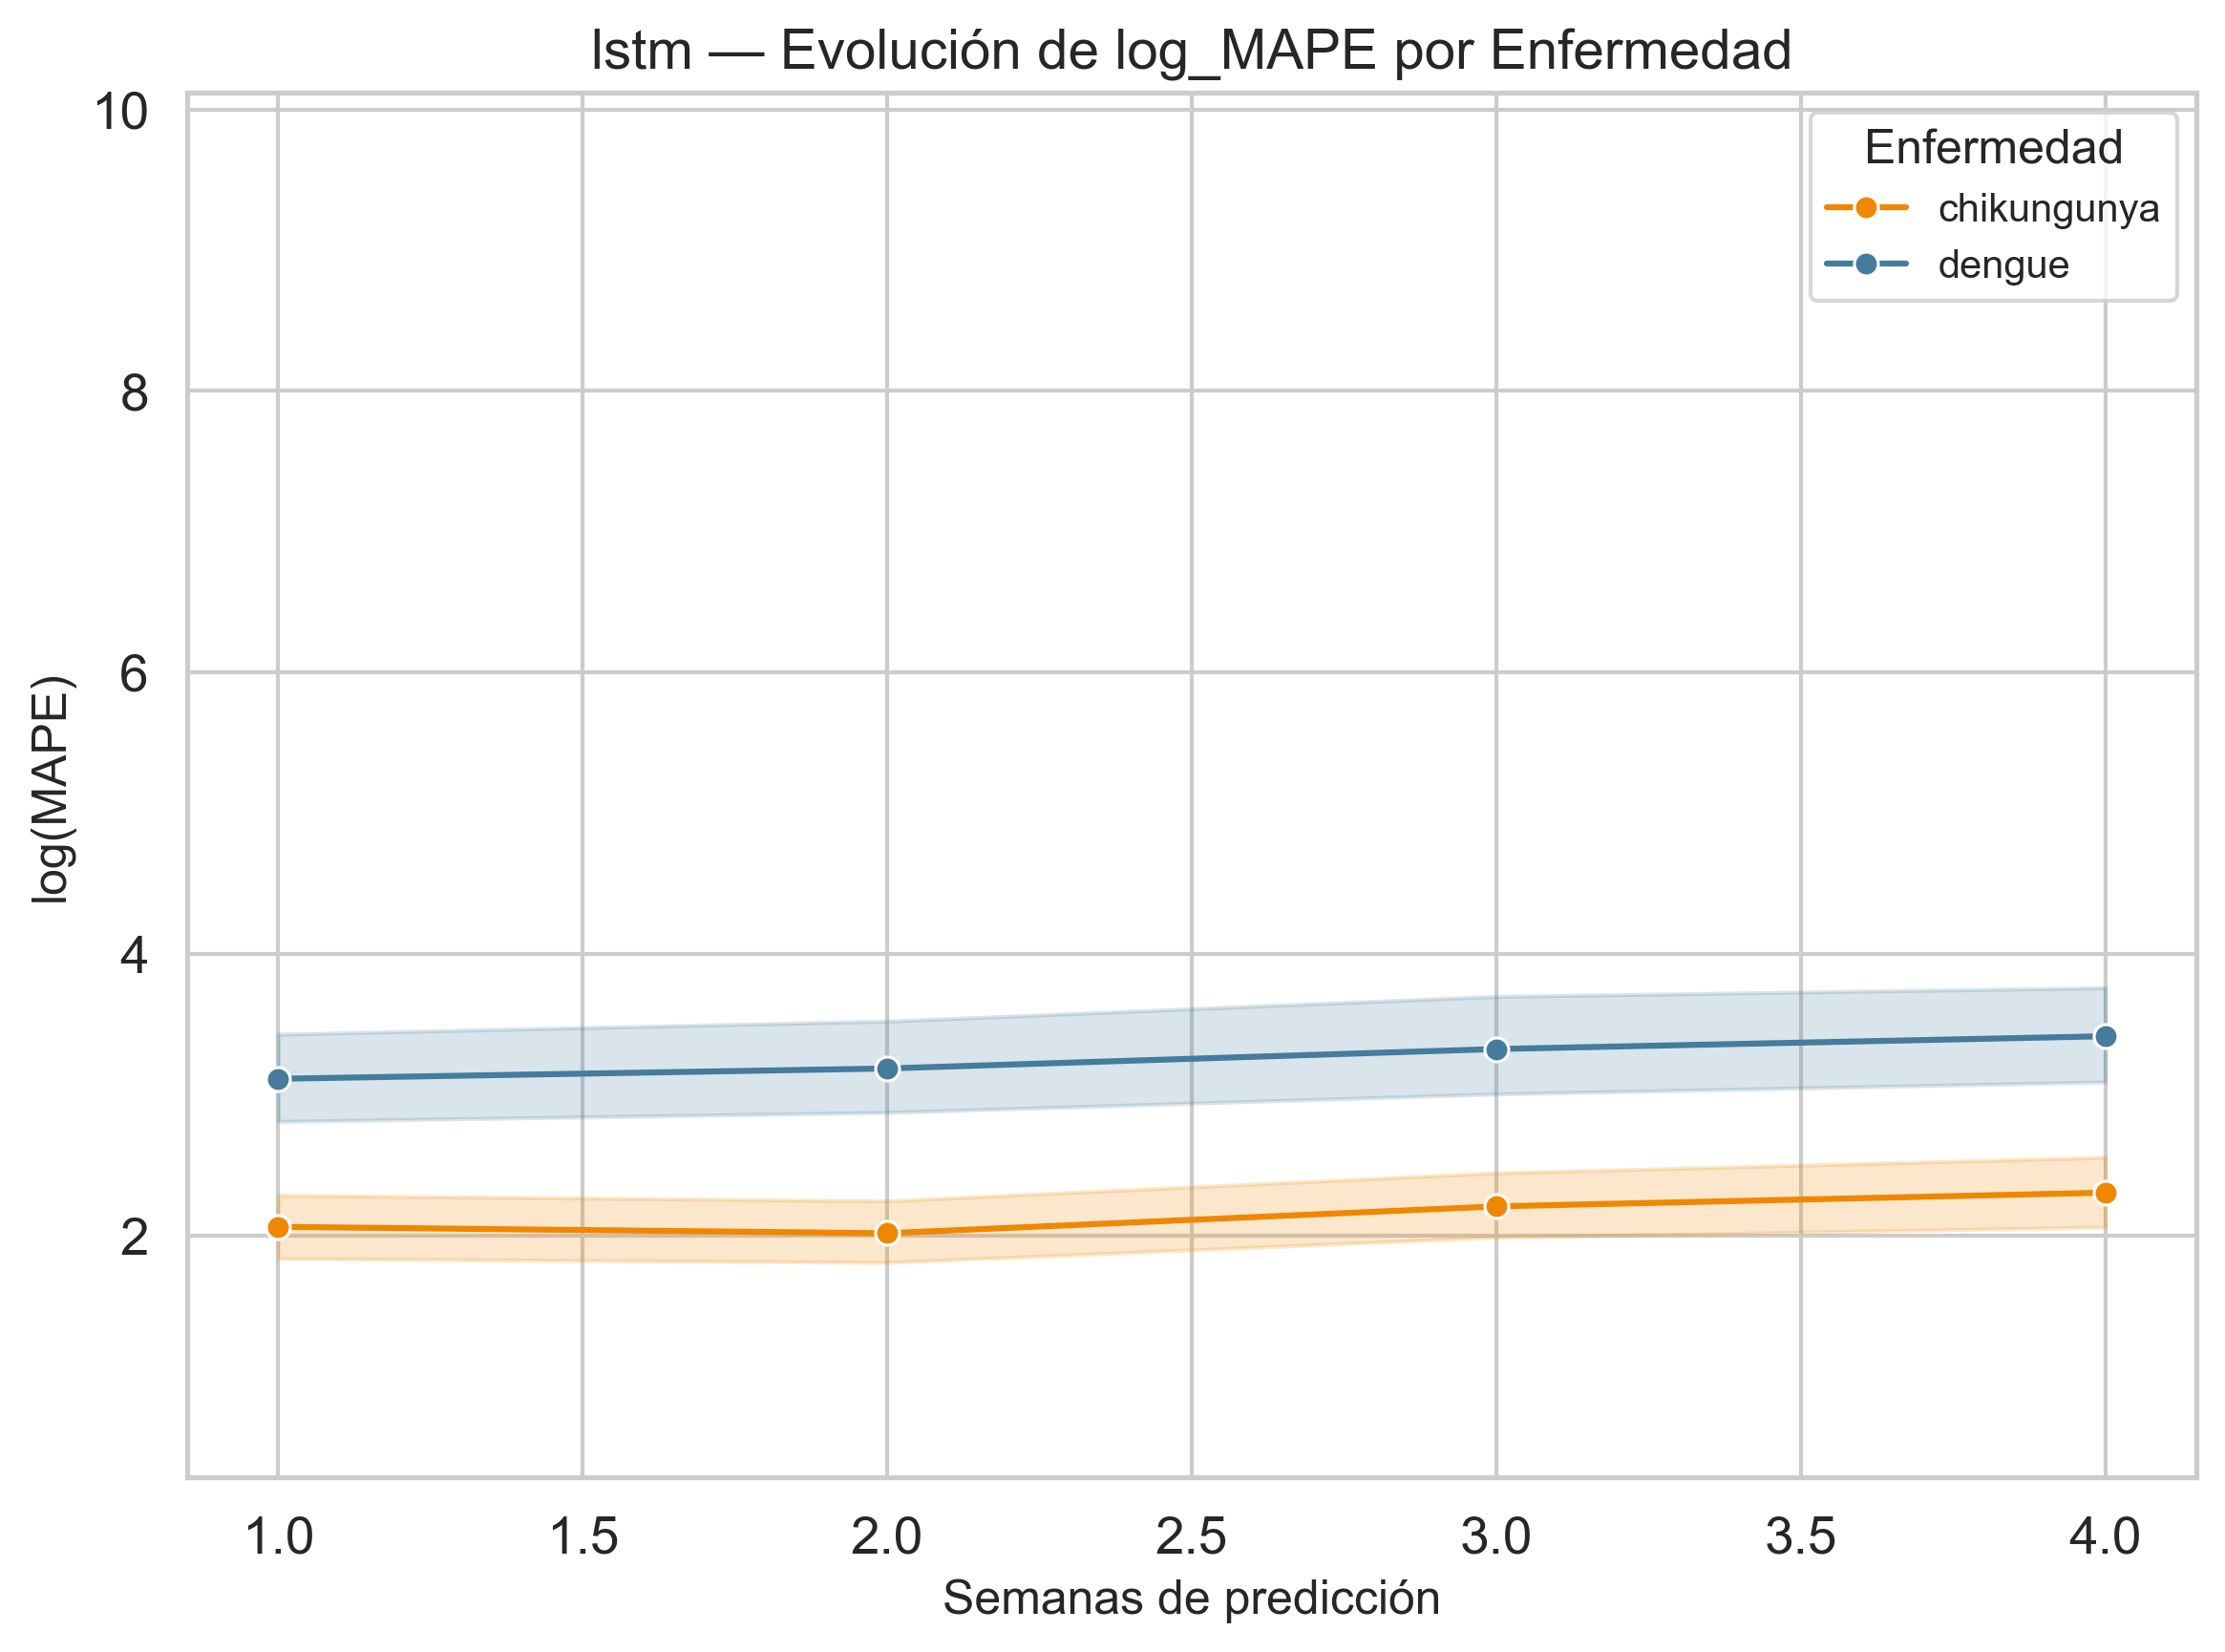

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongo que tu DataFrame ya tiene la columna 'Prediction Weeks'
# y log_MAPE añadida (si fuera necesario puedes calcularla con np.log1p)

palette = {"chikungunya": "#F08700", "dengue": "#457B9D"}

# Lista de métodos ordenada
orden_metodos = [
    "exponential", "subexponential", "subexponential amortized",
    "svr", "knn", "autoarima", "mlp", "lstm"
]

for method in orden_metodos:
    df_m = df[df["Method"] == method]
    if df_m.empty:
        continue

    plt.figure(figsize=(8, 6))
    ax = sns.lineplot(
        data=df_m,
        x="Prediction Weeks",
        y="log_MAPE",
        hue="Disease",
        palette=palette,
        marker="o"
    )

    ax.set_title(f"{method} — Evolución de log_MAPE por Enfermedad", fontsize=14)
    ax.set_xlabel("Semanas de predicción", fontsize=12)
    ax.set_ylabel("log(MAPE)", fontsize=12)
    ax.legend(title="Enfermedad", fontsize=10, title_fontsize=12)
    ax.set_ylim(df_m["log_MAPE"].min() * 0.9, df_m["log_MAPE"].max() * 1.1)

    plt.tight_layout()
    plt.savefig(f"lineplot_logmape_{method}.png", dpi=300)
    plt.show()




In [ ]:
# HEATMAP: MAE promedio por Método y Nivel
pivot = df.pivot_table(index="Method", columns="Level", values="log_MAE", aggfunc="mean")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("MAE promedio por Método y Nivel geográfico")
plt.xlabel("Nivel geográfico")
plt.ylabel("Modelo")
plt.tight_layout()
plt.savefig("heatmap_mae_method_level.png")
plt.show()



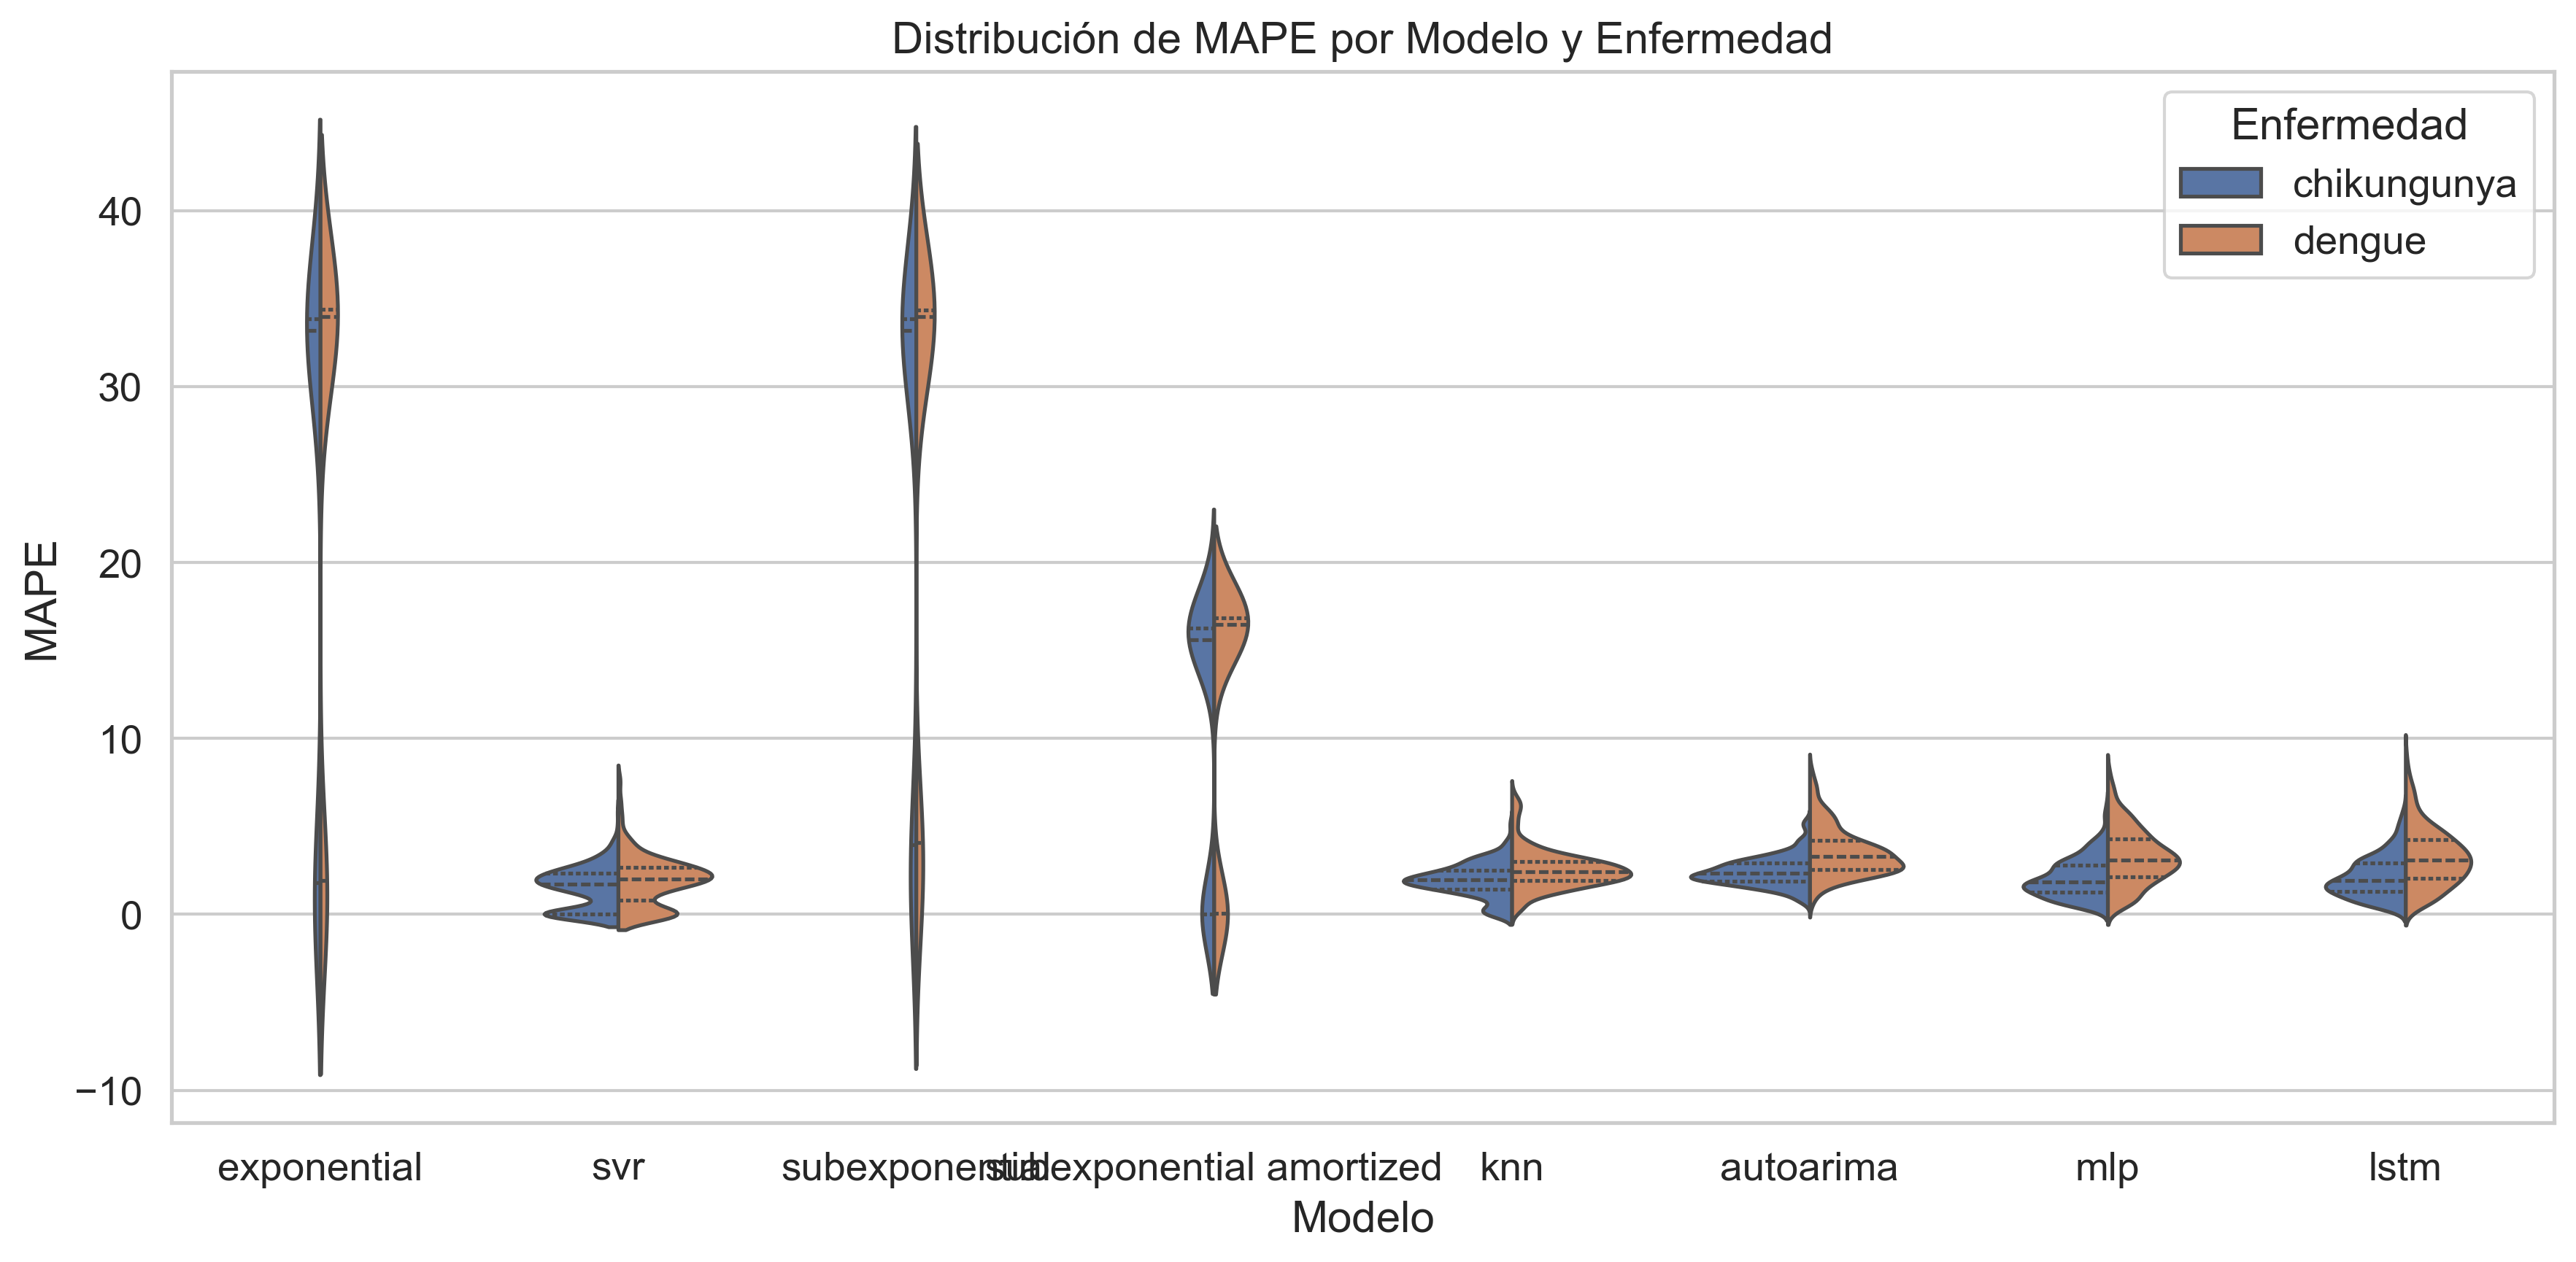

In [46]:

# OPCIONAL: Violinplot de MAPE por método y enfermedad
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="Method", y="log_MAPE", hue="Disease", split=True, inner="quartile")
plt.title("Distribución de MAPE por Modelo y Enfermedad")
plt.xlabel("Modelo")
plt.ylabel("MAPE")
plt.legend(title="Enfermedad")
plt.tight_layout()
plt.savefig("violinplot_mape_method_disease.png")
plt.show()

TypeError: agg function failed [how->mean,dtype->object]